In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from datetime import datetime 
import plotly.express as ex

## **Reading Date**

In [491]:
data=pd.read_csv("/content/prosperLoanData.csv")
data.head(10)


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [492]:
data.shape

(113937, 81)

In [493]:
data.columns 

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [494]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

ListingKey  :  0
ListingNumber  :  0
ListingCreationDate  :  0
CreditGrade  :  84984
Term  :  0
LoanStatus  :  0
ClosedDate  :  58848
BorrowerAPR  :  25
BorrowerRate  :  0
LenderYield  :  0
EstimatedEffectiveYield  :  29084
EstimatedLoss  :  29084
EstimatedReturn  :  29084
ProsperRating (numeric)  :  29084
ProsperRating (Alpha)  :  29084
ProsperScore  :  29084
ListingCategory (numeric)  :  0
BorrowerState  :  5515
Occupation  :  3588
EmploymentStatus  :  2255
EmploymentStatusDuration  :  7625
IsBorrowerHomeowner  :  0
CurrentlyInGroup  :  0
GroupKey  :  100596
DateCreditPulled  :  0
CreditScoreRangeLower  :  591
CreditScoreRangeUpper  :  591
FirstRecordedCreditLine  :  697
CurrentCreditLines  :  7604
OpenCreditLines  :  7604
TotalCreditLinespast7years  :  697
OpenRevolvingAccounts  :  0
OpenRevolvingMonthlyPayment  :  0
InquiriesLast6Months  :  697
TotalInquiries  :  1159
CurrentDelinquencies  :  697
AmountDelinquent  :  7622
DelinquenciesLast7Years  :  990
PublicRecordsLast10Years  : 

In [495]:
data["LoanCurrentDaysDelinquent"].unique()

array([   0,    3,  140, ...,  916, 2349, 1081])

In [496]:
data["LoanStatus"] = data["LoanCurrentDaysDelinquent"] > 180
data["LoanStatus"] = data["LoanStatus"].replace({True: 0, False: 1})
data["LoanStatus"].unique()

array([1, 0])

In [497]:
data.duplicated().sum()

0

In [498]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  int64  
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [500]:
data['ListingCreationDate']=pd.to_datetime(data['ListingCreationDate'])
data['ListingCreationDate'].unique()

array(['2007-08-26T19:09:29.263000000', '2014-02-27T08:28:07.900000000',
       '2007-01-05T15:00:47.090000000', ...,
       '2013-12-13T05:49:12.703000000', '2011-11-14T13:18:26.597000000',
       '2014-01-15T09:27:37.657000000'], dtype='datetime64[ns]')

In [501]:
data['ListingCreationDate_date_day']=data['ListingCreationDate'].dt.day
data['ListingCreationDate_date_month']=data['ListingCreationDate'].dt.month
data['ListingCreationDate_date_year']=data['ListingCreationDate'].dt.year
data['ListingCreationDate_date_hour']=data['ListingCreationDate'].dt.hour
data['ListingCreationDate_date_minute']=data['ListingCreationDate'].dt.minute
data['ListingCreationDate_date_second']=data['ListingCreationDate'].dt.second

In [502]:
data['ClosedDate']=pd.to_datetime(data['ClosedDate'])
data['ClosedDate'].unique()

array(['2009-08-14T00:00:00.000000000',                           'NaT',
       '2009-12-17T00:00:00.000000000', ...,
       '2006-10-25T00:00:00.000000000', '2005-12-08T00:00:00.000000000',
       '2005-11-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [503]:
data['ClosedDate'] = data['ClosedDate'].fillna(data['ClosedDate'].dropna().mean())
data['ClosedDate_day']=data['ClosedDate'].dt.day
data['ClosedDate_month']=data['ClosedDate'].dt.month
data['ClosedDate_year']=data['ClosedDate'].dt.year
data['ClosedDate_hour']=data['ClosedDate'].dt.hour
data['ClosedDate_minute']=data['ClosedDate'].dt.minute
data['ClosedDate_second']=data['ClosedDate'].dt.second

In [504]:
data['FirstRecordedCreditLine']=pd.to_datetime(data['FirstRecordedCreditLine'])
data['FirstRecordedCreditLine'] = data['FirstRecordedCreditLine'].fillna(data['FirstRecordedCreditLine'].dropna().mean())

In [505]:

data['FirstRecordedCreditLine'].unique()

array(['2001-10-11T00:00:00.000000000', '1996-03-18T00:00:00.000000000',
       '2002-07-27T00:00:00.000000000', ...,
       '1979-06-10T00:00:00.000000000', '1985-04-14T00:00:00.000000000',
       '2006-09-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [506]:

data['FirstRecordedCreditLine_day']=data['FirstRecordedCreditLine'].dt.day
data['FirstRecordedCreditLine_month']=data['FirstRecordedCreditLine'].dt.month
data['FirstRecordedCreditLine_year']=data['FirstRecordedCreditLine'].dt.year
data['FirstRecordedCreditLine_hour']=data['FirstRecordedCreditLine'].dt.hour
data['FirstRecordedCreditLine_minute']=data['FirstRecordedCreditLine'].dt.minute
data['FirstRecordedCreditLine_second']=data['FirstRecordedCreditLine'].dt.second

In [507]:
data['DateCreditPulled']=pd.to_datetime(data['DateCreditPulled'])
data['DateCreditPulled'].unique()

array(['2007-08-26T18:41:46.780000000', '2014-02-27T08:28:14.000000000',
       '2007-01-02T14:09:10.060000000', ...,
       '2013-12-13T05:49:15.000000000', '2011-11-14T13:18:24.000000000',
       '2014-01-15T09:27:40.000000000'], dtype='datetime64[ns]')

In [508]:

data['DateCreditPulled_day']=data['DateCreditPulled'].dt.day
data['DateCreditPulled_month']=data['DateCreditPulled'].dt.month
data['DateCreditPulled_year']=data['DateCreditPulled'].dt.year
data['DateCreditPulled_hour']=data['DateCreditPulled'].dt.hour
data['DateCreditPulled_minute']=data['DateCreditPulled'].dt.minute
data['DateCreditPulled_second']=data['DateCreditPulled'].dt.second

In [509]:
data['ListingCreationDate']=pd.to_datetime(data['ListingCreationDate'])

In [510]:

data['ListingCreationDate_day']=data['ListingCreationDate'].dt.day
data['ListingCreationDate_month']=data['ListingCreationDate'].dt.month
data['ListingCreationDate_year']=data['ListingCreationDate'].dt.year
data['ListingCreationDate_hour']=data['ListingCreationDate'].dt.hour
data['ListingCreationDate_minute']=data['ListingCreationDate'].dt.minute
data['ListingCreationDate_second']=data['ListingCreationDate'].dt.second

In [511]:
data['LoanOriginationDate']=pd.to_datetime(data['LoanOriginationDate'])


In [512]:

data['LoanOriginationDate_day']=data['LoanOriginationDate'].dt.day
data['LoanOriginationDate_month']=data['LoanOriginationDate'].dt.month
data['LoanOriginationDate_year']=data['LoanOriginationDate'].dt.year
data['LoanOriginationDate_hour']=data['LoanOriginationDate'].dt.hour
data['LoanOriginationDate_minute']=data['LoanOriginationDate'].dt.minute
data['LoanOriginationDate_second']=data['LoanOriginationDate'].dt.second

In [513]:
data.shape

(113937, 117)

In [514]:
data.drop(data[["LoanOriginationDate","ListingCreationDate","DateCreditPulled","FirstRecordedCreditLine","ClosedDate","ListingCreationDate_date_day","LoanOriginationDate"]],axis=1,inplace=True)

In [515]:
data.shape

(113937, 111)

In [516]:

data['BankcardUtilization'].fillna(data['BankcardUtilization'].mean(),inplace=True)
data['TradesOpenedLast6Months'].fillna(data['TradesOpenedLast6Months'].mean(),inplace=True)
data['TradesNeverDelinquent (percentage)'].fillna(data['TradesNeverDelinquent (percentage)'].mean(),inplace=True)
data['TotalTrades'].fillna(data['TotalTrades'].mean(),inplace=True)
data['TotalProsperPaymentsBilled'].fillna(data['TotalProsperPaymentsBilled'].mean(),inplace=True)
data['TotalProsperLoans'].fillna(data['TotalProsperLoans'].mean(),inplace=True)
data['TotalInquiries'].fillna(data['TotalInquiries'].mean(),inplace=True)
data['ScorexChangeAtTimeOfListing'].fillna(data['ScorexChangeAtTimeOfListing'].mean(),inplace=True)
data['RevolvingCreditBalance'].fillna(data['RevolvingCreditBalance'].mean(),inplace=True)
data['PublicRecordsLast12Months'].fillna(data['PublicRecordsLast12Months'].mean(),inplace=True)
data['ProsperScore'].fillna(data['ProsperScore'].mean(),inplace=True)
data['ProsperRating (numeric)'].fillna(data['ProsperRating (numeric)'].mean(),inplace=True)
data['ProsperPrincipalOutstanding'].fillna(data['ProsperPrincipalOutstanding'].mean(),inplace=True)
data['ProsperPrincipalBorrowed'].fillna(data['ProsperPrincipalBorrowed'].mean(),inplace=True)
data['ProsperPaymentsOneMonthPlusLate'].fillna(data['ProsperPaymentsOneMonthPlusLate'].mean(),inplace=True)
data['OpenCreditLines'].fillna(data['OpenCreditLines'].mean(),inplace=True)
data['LoanFirstDefaultedCycleNumber'].fillna(data['LoanFirstDefaultedCycleNumber'].mean(),inplace=True)
data['EstimatedReturn'].fillna(data['EstimatedReturn'].mean(),inplace=True)
data['EstimatedLoss'].fillna(data['EstimatedLoss'].mean(),inplace=True)
data['EstimatedEffectiveYield'].fillna(data['EstimatedEffectiveYield'].mean(),inplace=True)
data['DelinquenciesLast7Years'].fillna(data['DelinquenciesLast7Years'].mean(),inplace=True)
data['CurrentCreditLines'].fillna(data['CurrentCreditLines'].mean(),inplace=True)
data['CreditGrade'].fillna(data['CreditGrade'].mode()[0],inplace=True)
data['GroupKey'].fillna(data['GroupKey'].mode()[0],inplace=True)
data['CreditGrade'].fillna(data['CreditGrade'].mode()[0],inplace=True)


In [517]:

data['PublicRecordsLast10Years'] = data['PublicRecordsLast10Years'].fillna(
data['PublicRecordsLast10Years'].dropna().mean())


data['TotalCreditLinespast7years'] = data['TotalCreditLinespast7years'].fillna(
data['TotalCreditLinespast7years'].dropna().mean())


data['InquiriesLast6Months'] = data['InquiriesLast6Months'].fillna(
data['InquiriesLast6Months'].dropna().mean())


data['CurrentDelinquencies'] = data['CurrentDelinquencies'].fillna(
data['CurrentDelinquencies'].dropna().mean())


data['CreditScoreRangeLower'] = data['CreditScoreRangeLower'].fillna(
data['CreditScoreRangeLower'].dropna().mean())

data['CreditScoreRangeUpper'] = data['CreditScoreRangeUpper'].fillna(
data['CreditScoreRangeUpper'].dropna().mean())

data['BorrowerAPR'] = data['BorrowerAPR'].fillna(
data['BorrowerAPR'].dropna().mean())

data['EmploymentStatusDuration'] = data['EmploymentStatusDuration'].fillna(
data['EmploymentStatusDuration'].dropna().mean())




data['AmountDelinquent'] = data['AmountDelinquent'].fillna(
data['AmountDelinquent'].dropna().mean())


data['AvailableBankcardCredit'] = data['AvailableBankcardCredit'].fillna(
data['AvailableBankcardCredit'].dropna().mean())

data['OnTimeProsperPayments'] = data['OnTimeProsperPayments'].fillna(
data['OnTimeProsperPayments'].dropna().mean())

data['DebtToIncomeRatio'] = data['DebtToIncomeRatio'].fillna(
data['DebtToIncomeRatio'].dropna().mean())

data['ProsperPaymentsLessThanOneMonthLate'] = data['ProsperPaymentsLessThanOneMonthLate'].fillna(
data['ProsperPaymentsLessThanOneMonthLate'].dropna().mean())


In [518]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

ListingKey  :  0
ListingNumber  :  0
CreditGrade  :  0
Term  :  0
LoanStatus  :  0
BorrowerAPR  :  0
BorrowerRate  :  0
LenderYield  :  0
EstimatedEffectiveYield  :  0
EstimatedLoss  :  0
EstimatedReturn  :  0
ProsperRating (numeric)  :  0
ProsperRating (Alpha)  :  29084
ProsperScore  :  0
ListingCategory (numeric)  :  0
BorrowerState  :  5515
Occupation  :  3588
EmploymentStatus  :  2255
EmploymentStatusDuration  :  0
IsBorrowerHomeowner  :  0
CurrentlyInGroup  :  0
GroupKey  :  0
CreditScoreRangeLower  :  0
CreditScoreRangeUpper  :  0
CurrentCreditLines  :  0
OpenCreditLines  :  0
TotalCreditLinespast7years  :  0
OpenRevolvingAccounts  :  0
OpenRevolvingMonthlyPayment  :  0
InquiriesLast6Months  :  0
TotalInquiries  :  0
CurrentDelinquencies  :  0
AmountDelinquent  :  0
DelinquenciesLast7Years  :  0
PublicRecordsLast10Years  :  0
PublicRecordsLast12Months  :  0
RevolvingCreditBalance  :  0
BankcardUtilization  :  0
AvailableBankcardCredit  :  0
TotalTrades  :  0
TradesNeverDelinquent

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Columns: 111 entries, ListingKey to LoanOriginationDate_second
dtypes: bool(3), float64(50), int64(47), object(11)
memory usage: 95.1+ MB


In [520]:
ex.pie(data,names='LoanStatus',width=500,height=500)

In [521]:
ex.pie(data,names='CreditGrade',width=500,height=500)

In [522]:
label_encoder = preprocessing.LabelEncoder()
data['IncomeRange'].unique()
mode=data['IncomeRange'].mode()
data['IncomeRange'].replace(["Not displayed","Not employed"],[mode,'$0'],inplace=True)
data['IncomeRange']= label_encoder.fit_transform(data['IncomeRange'])

In [523]:

for col in data.select_dtypes(include=['object','bool']).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  data[col]=label_encoder.transform(data[col])


In [524]:
features = data.select_dtypes(include=np.number)
col= features.columns
numeric_features = list(col) 


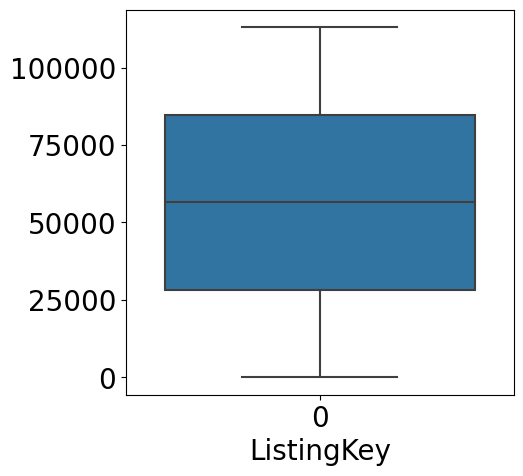

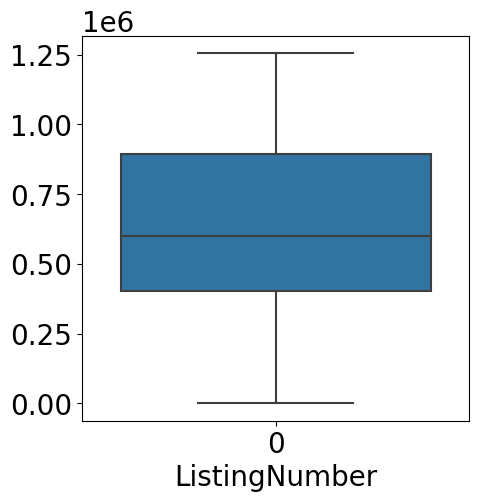

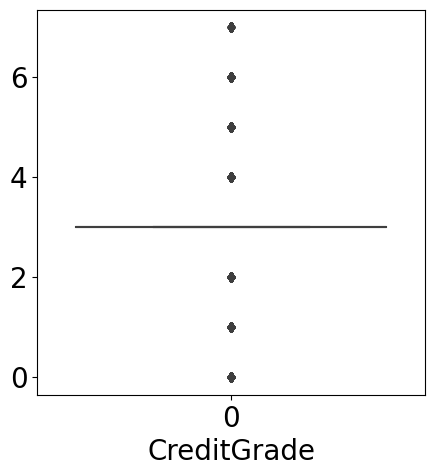

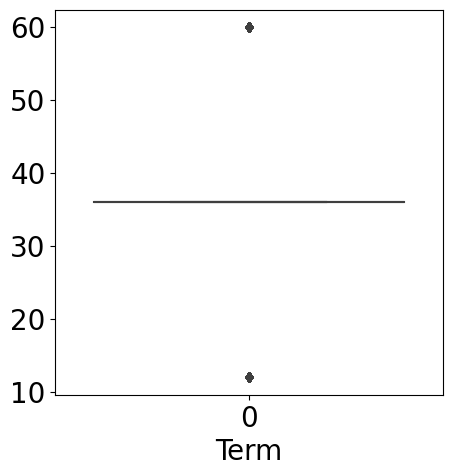

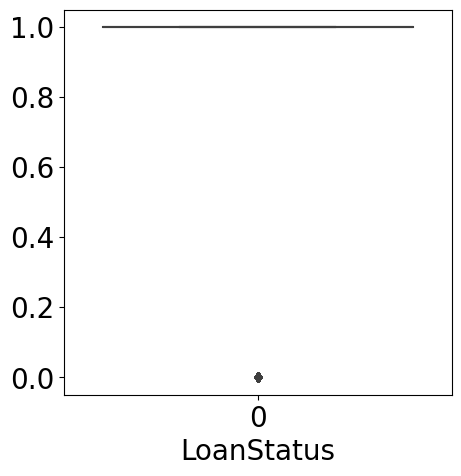

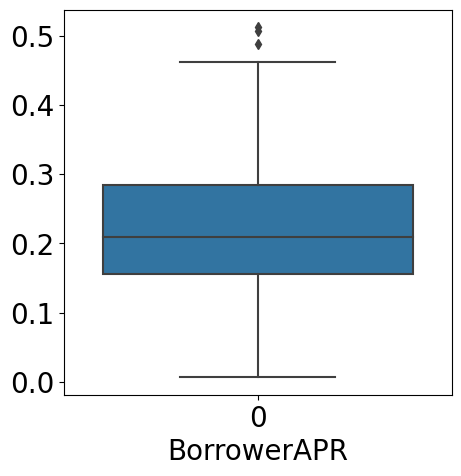

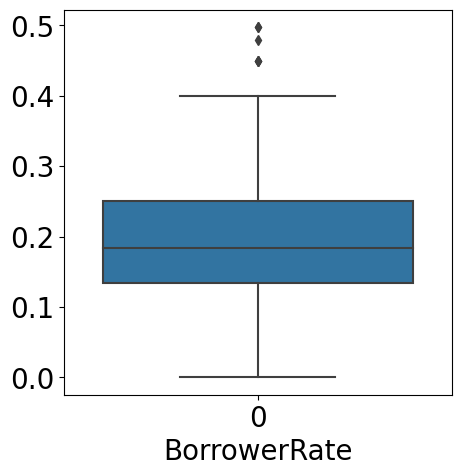

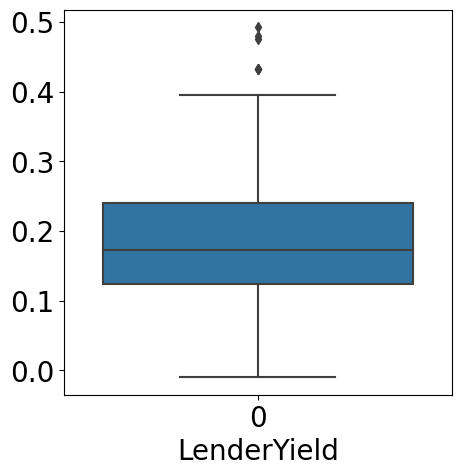

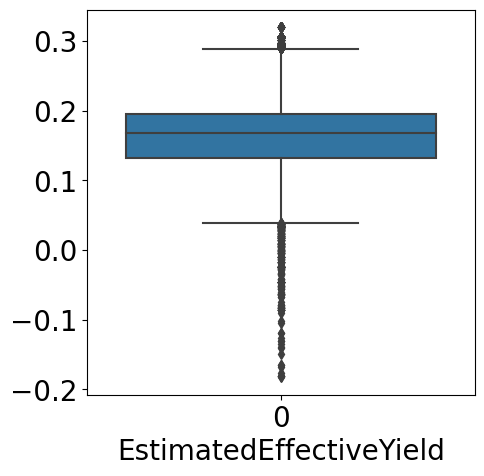

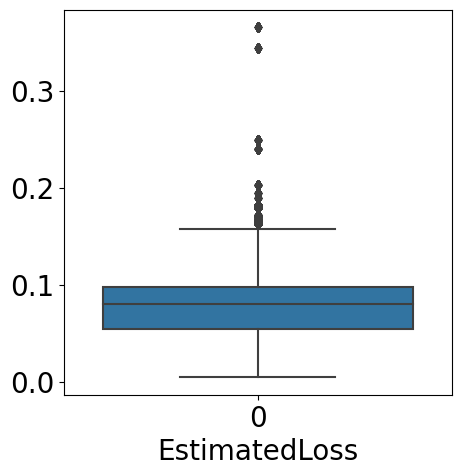

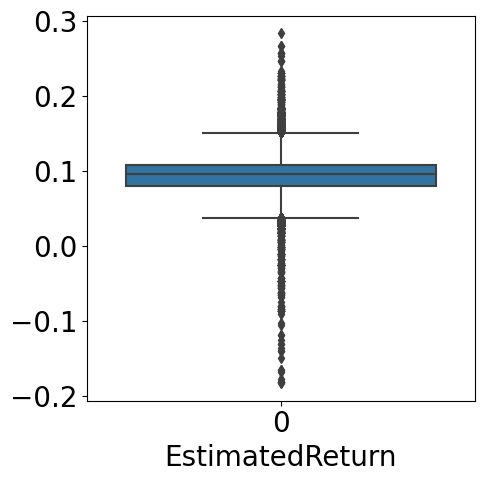

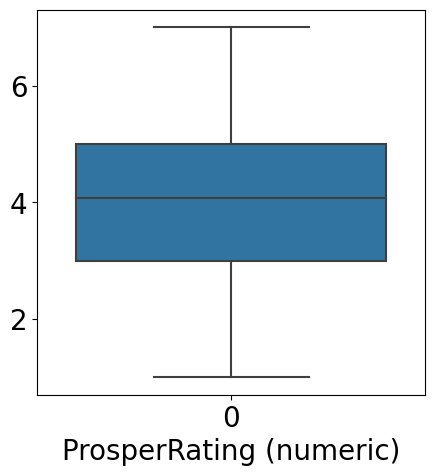

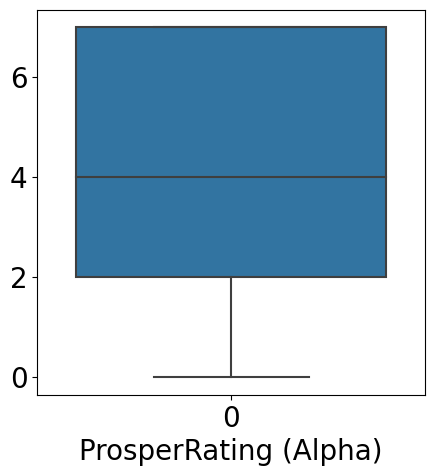

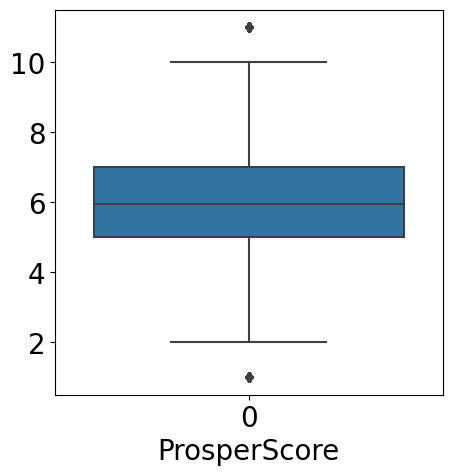

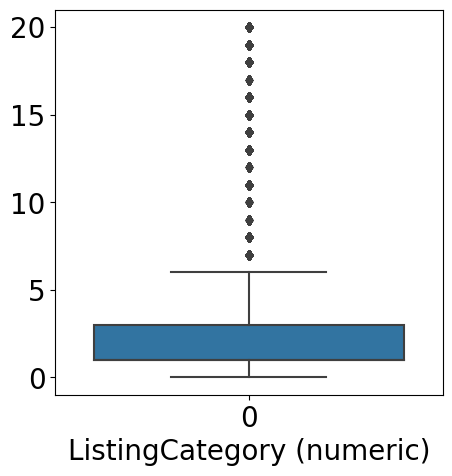

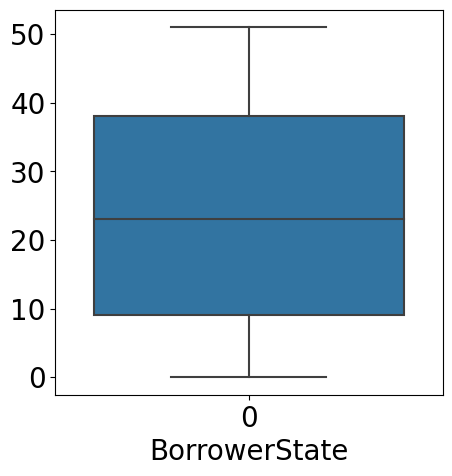

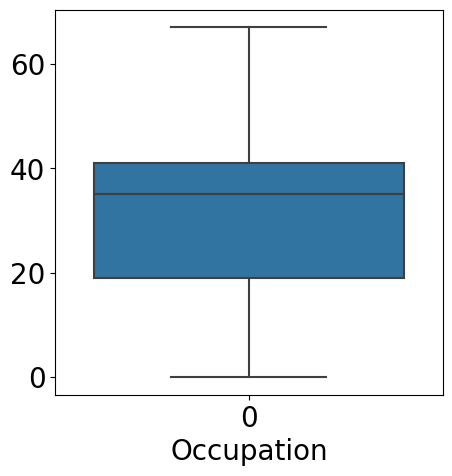

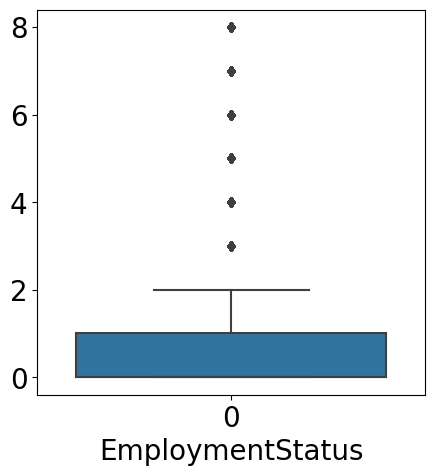

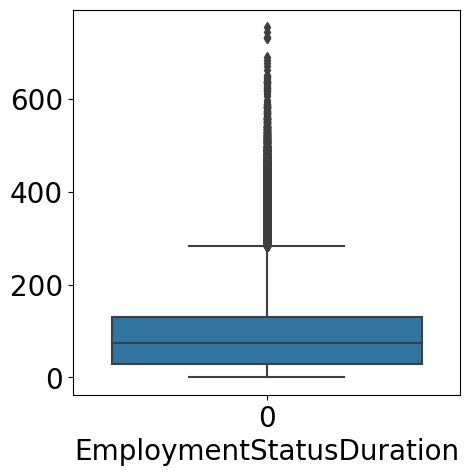

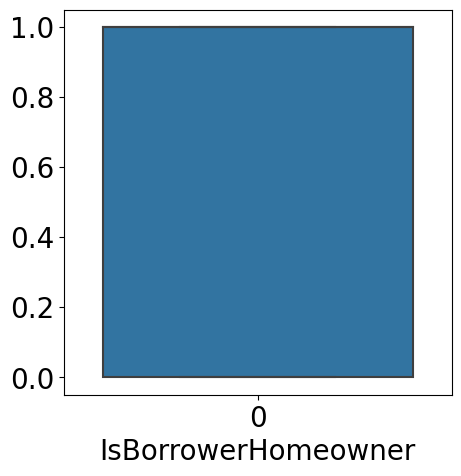

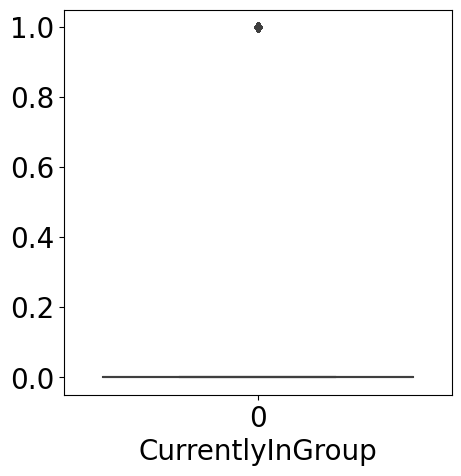

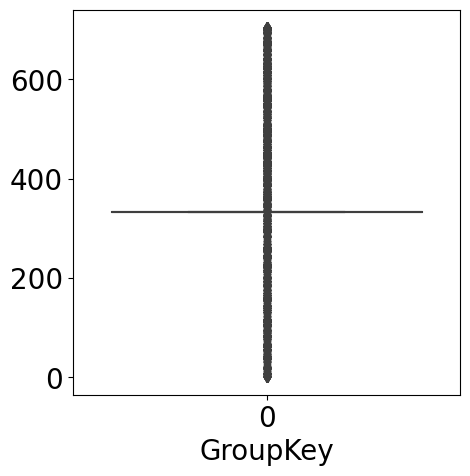

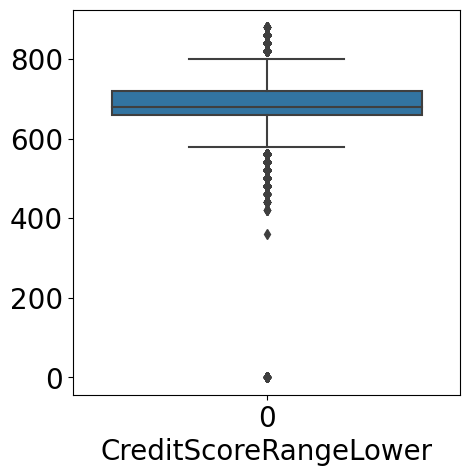

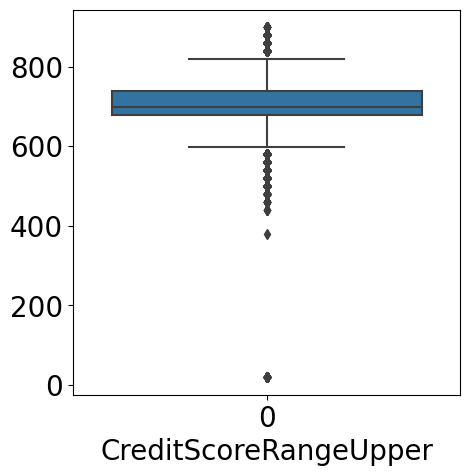

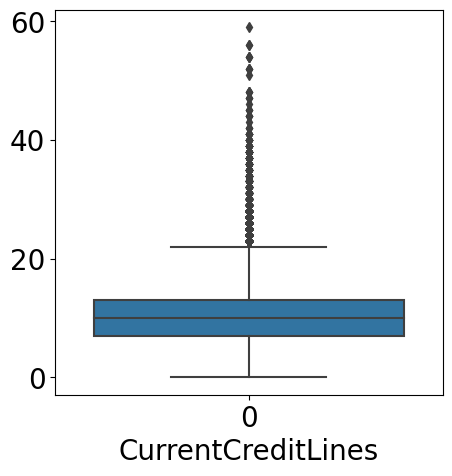

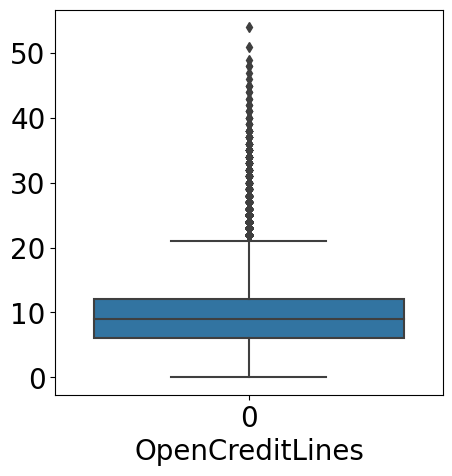

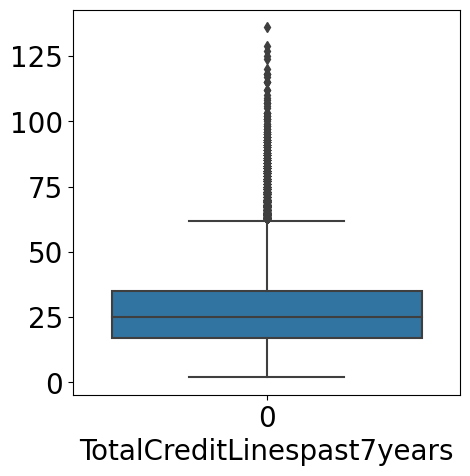

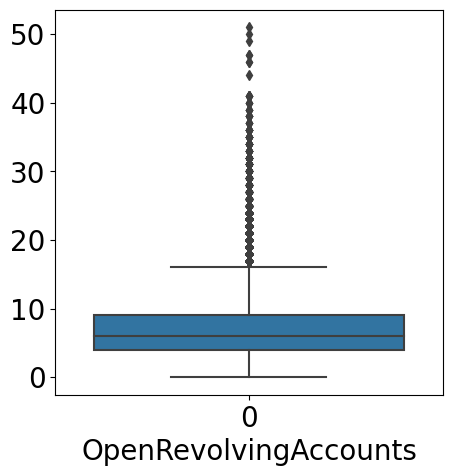

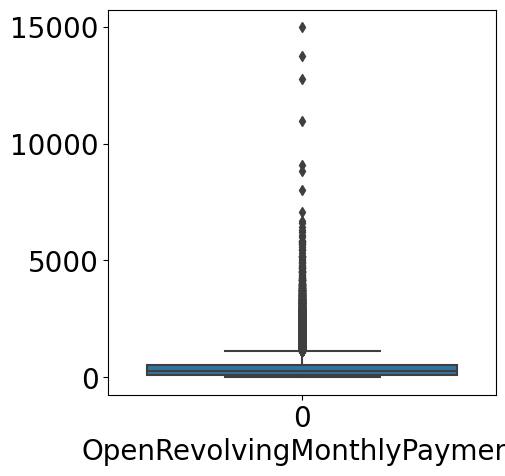

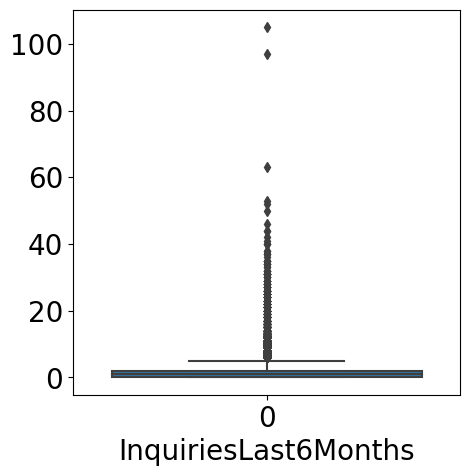

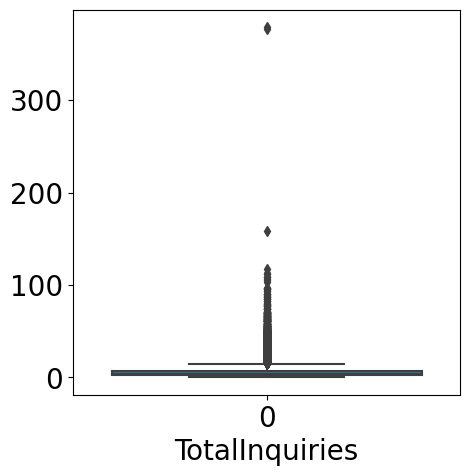

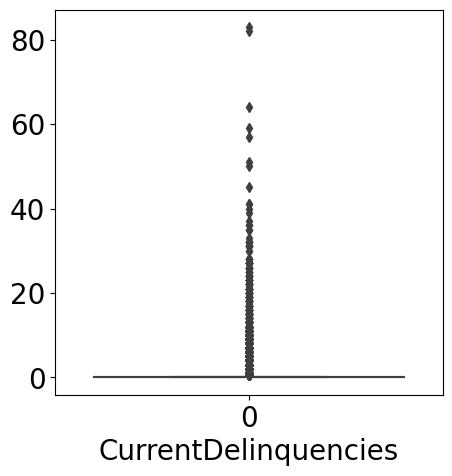

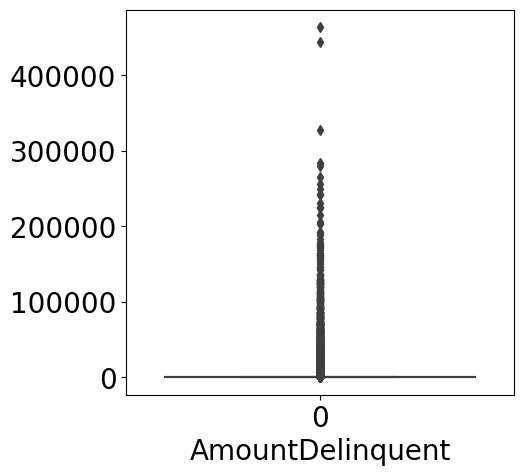

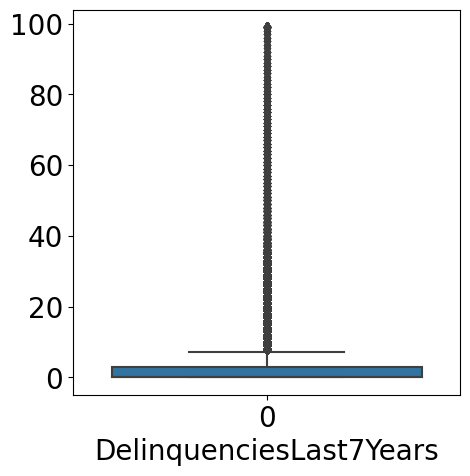

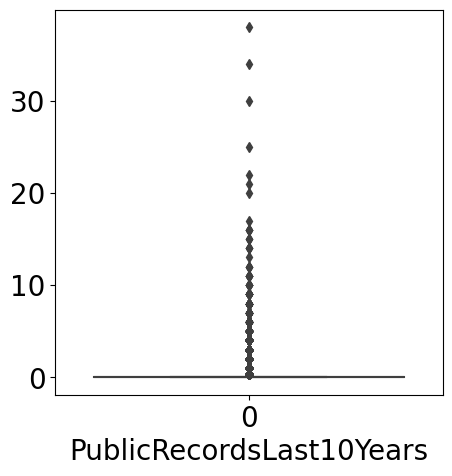

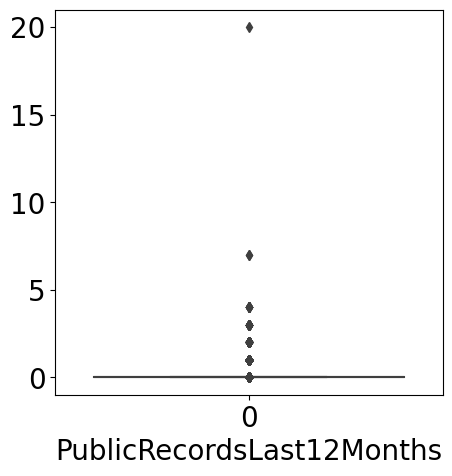

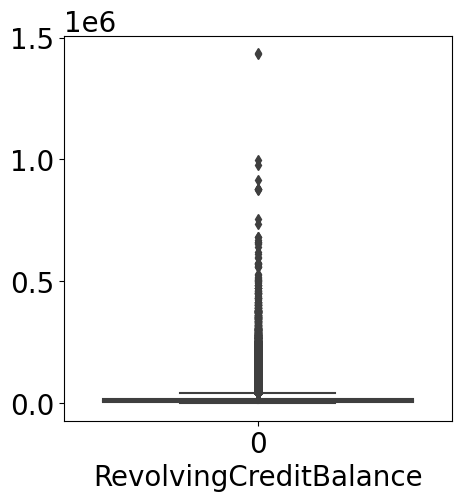

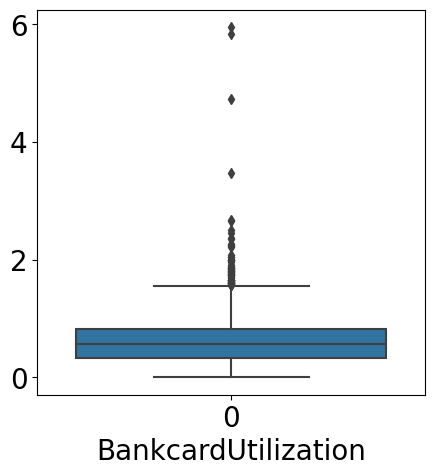

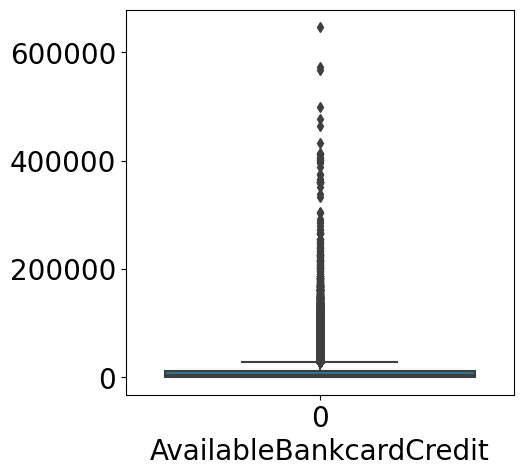

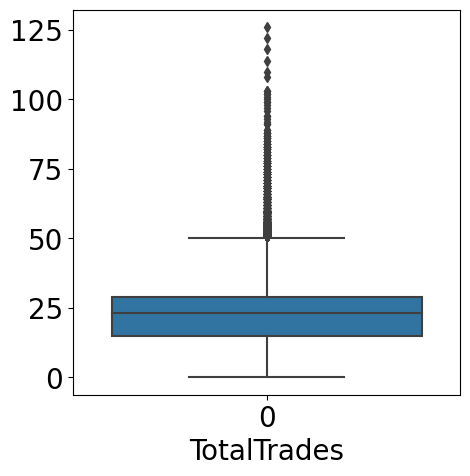

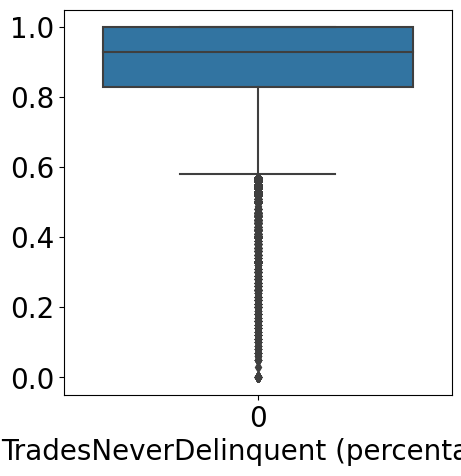

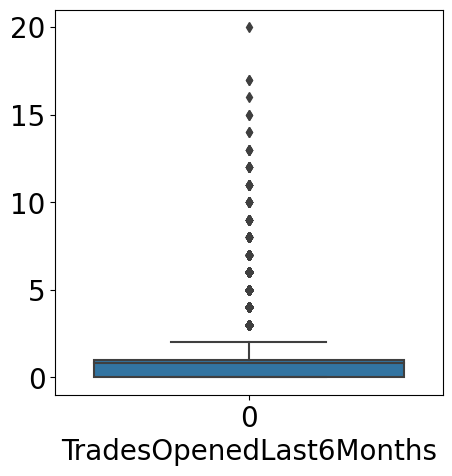

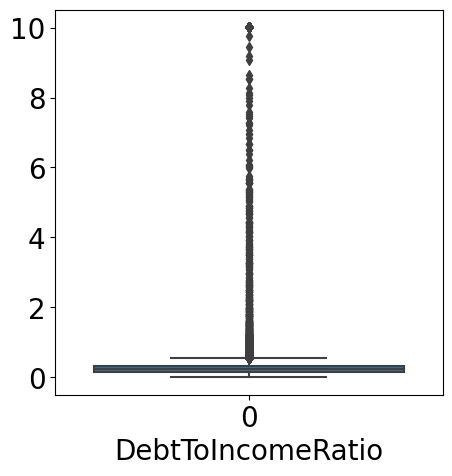

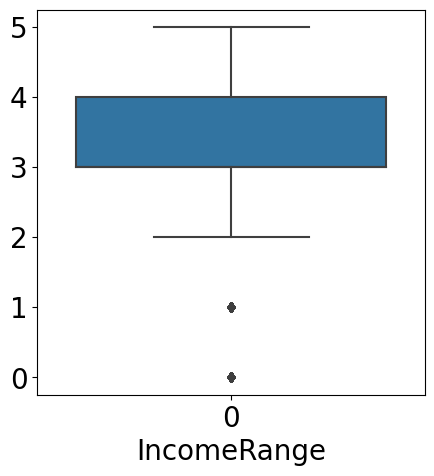

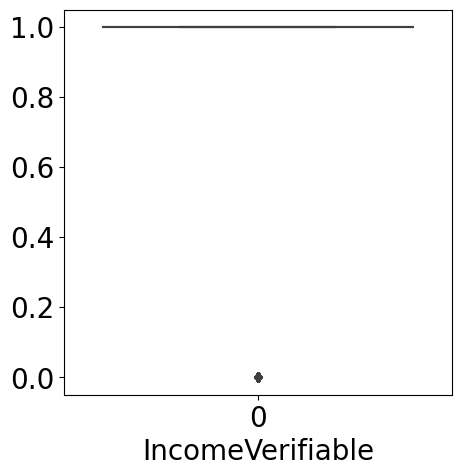

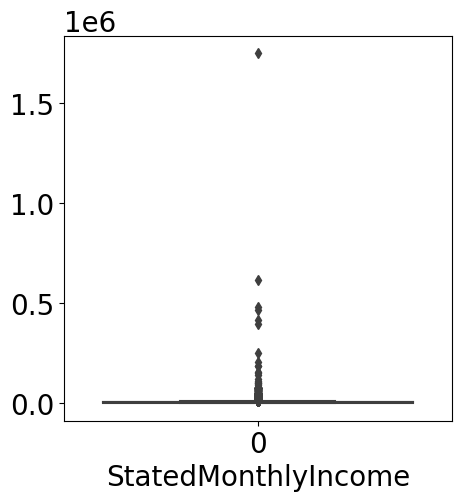

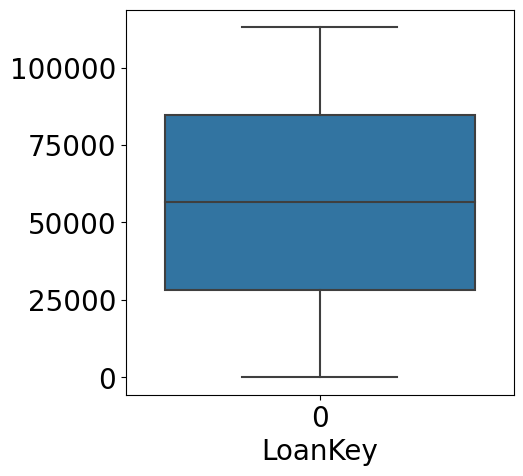

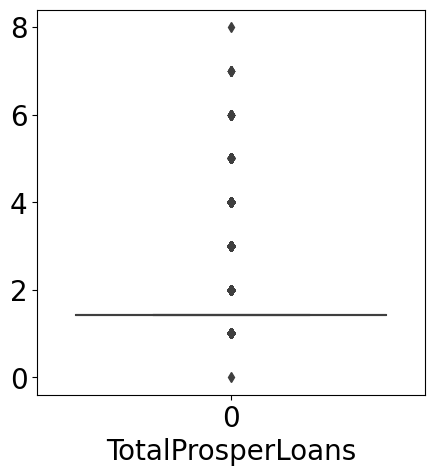

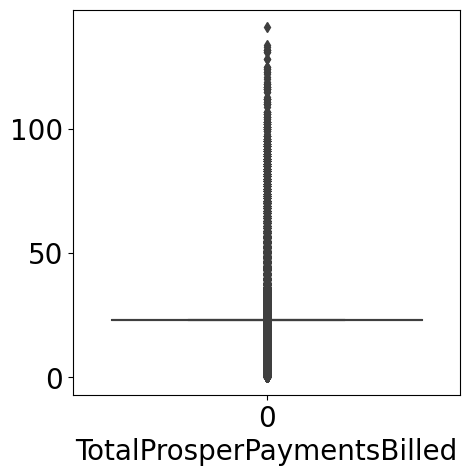

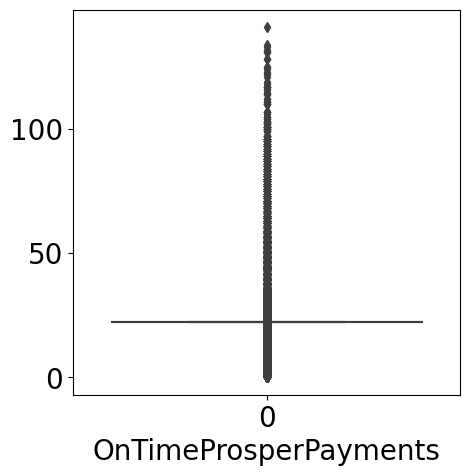

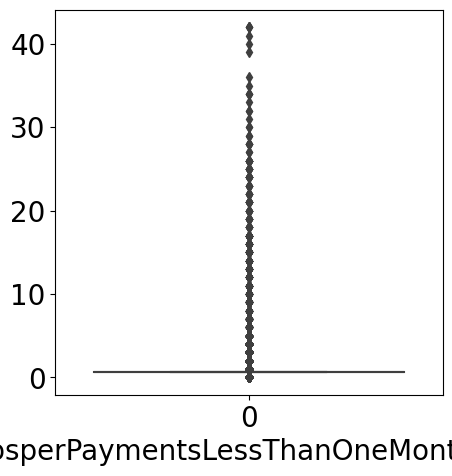

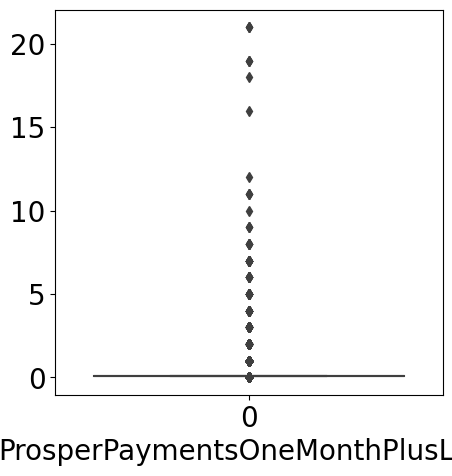

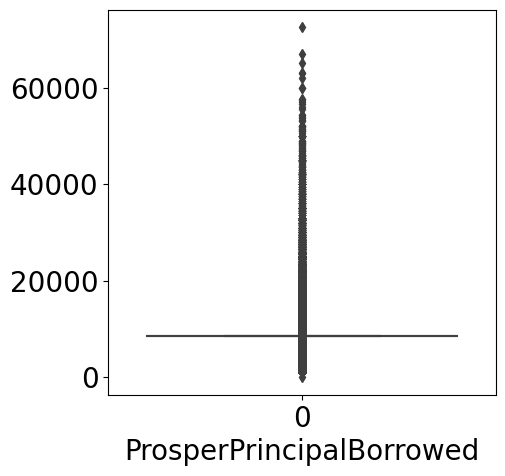

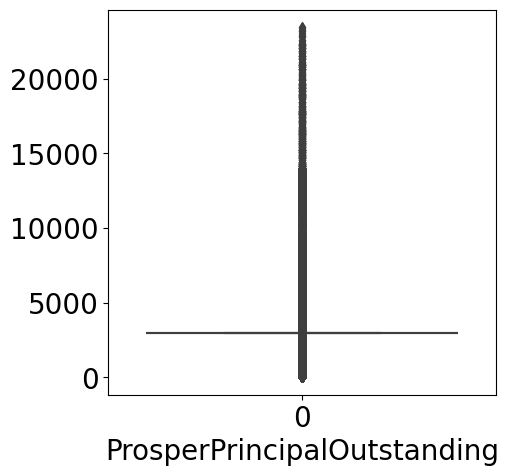

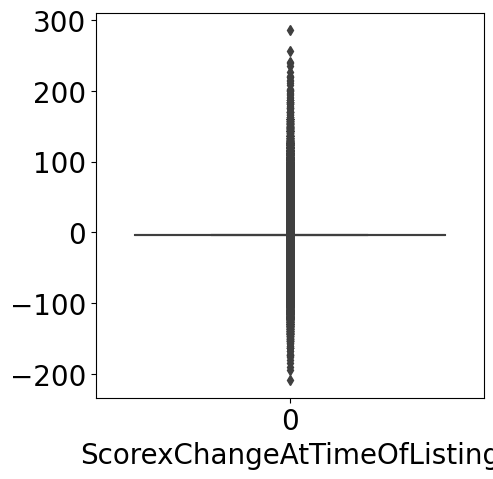

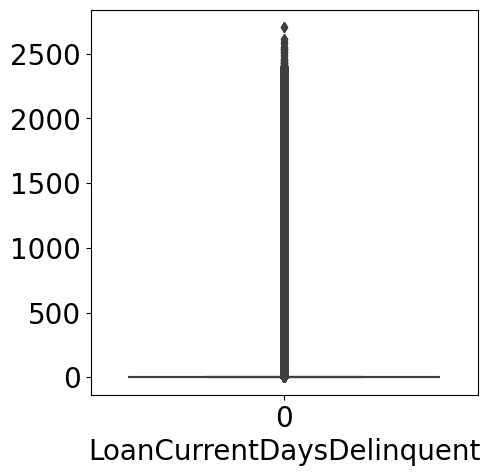

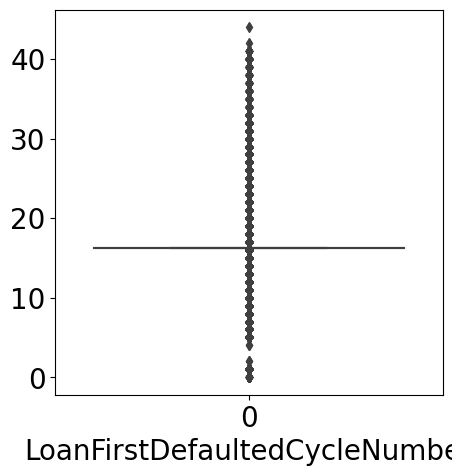

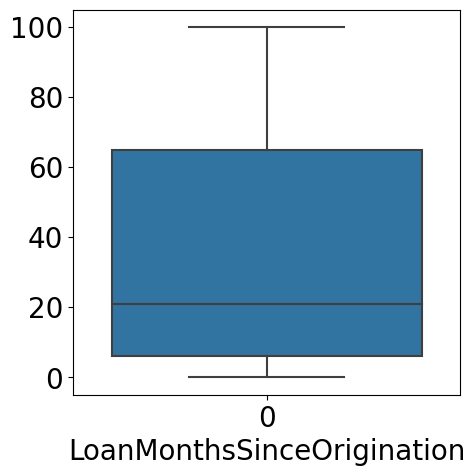

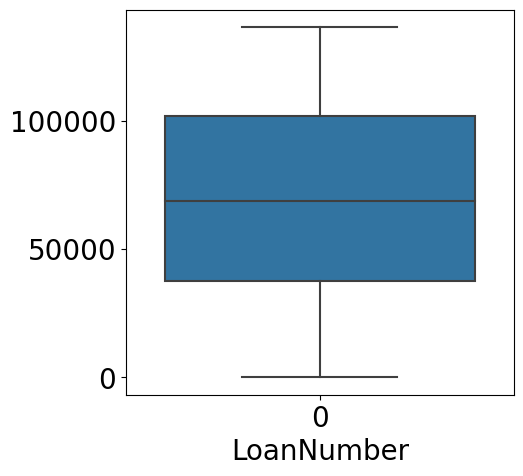

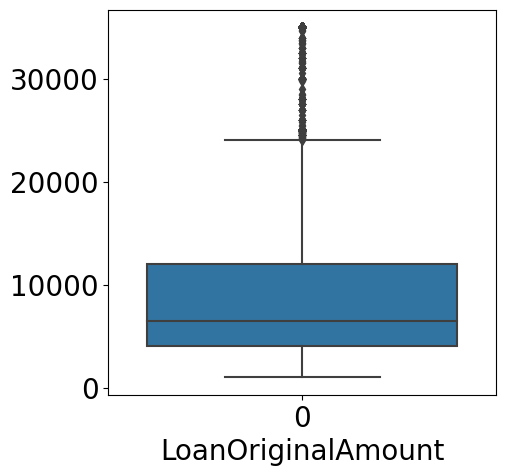

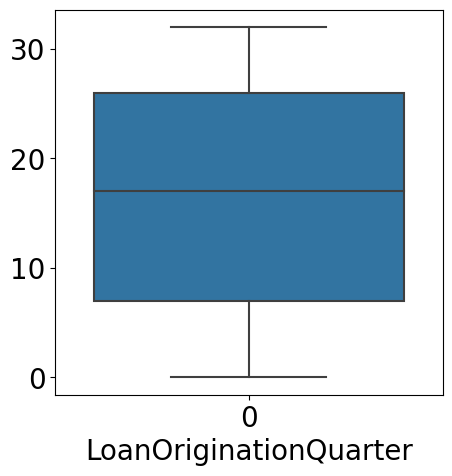

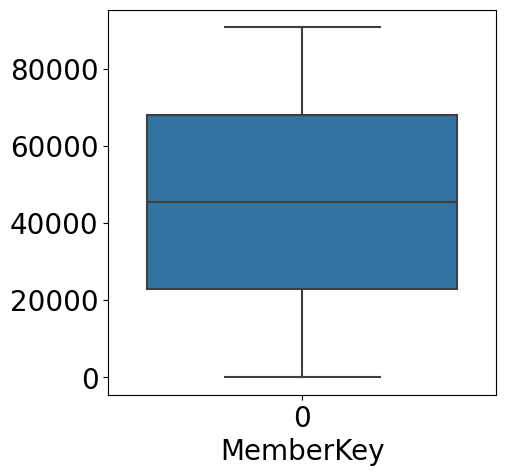

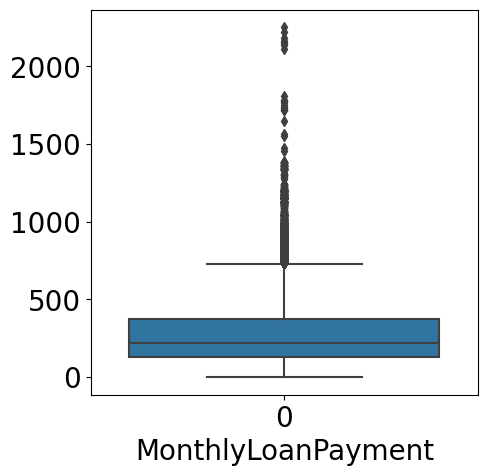

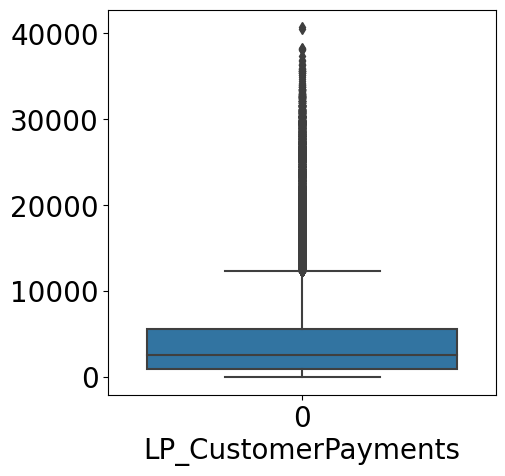

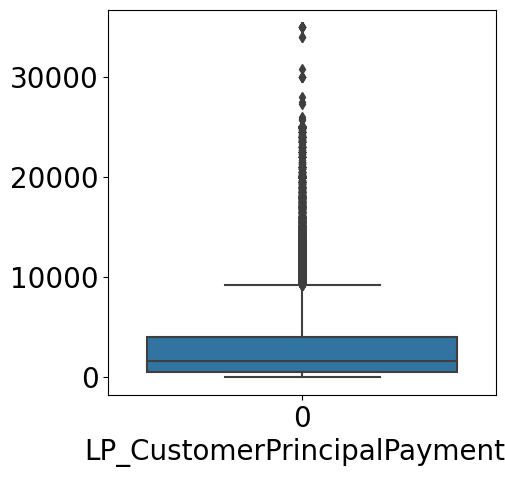

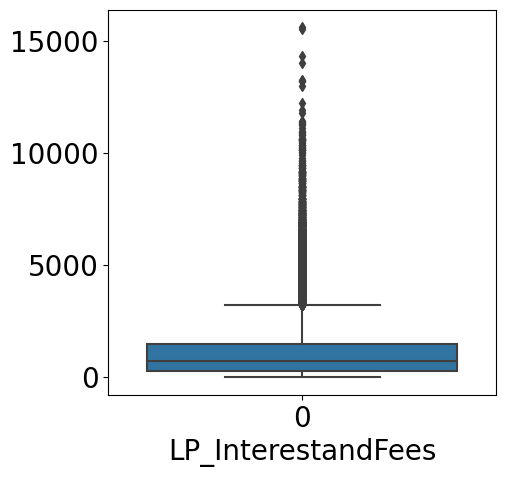

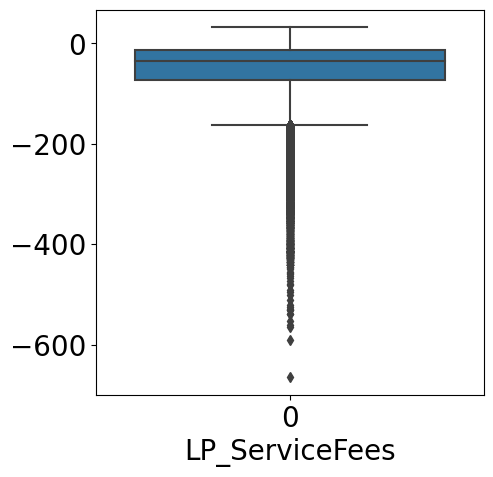

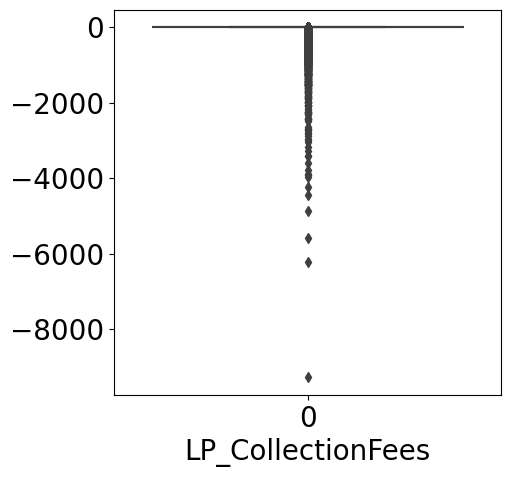

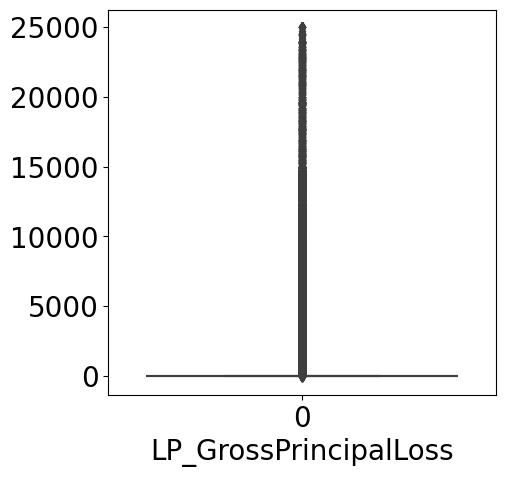

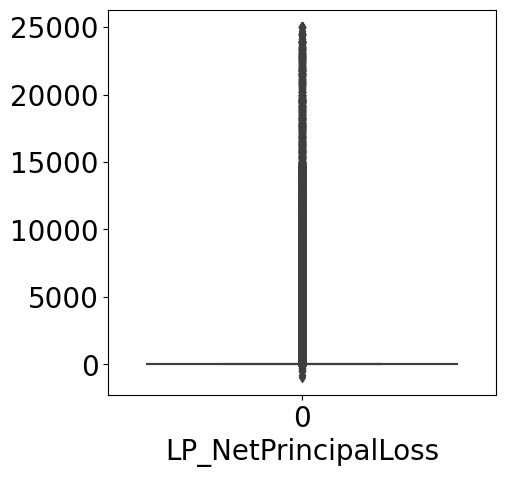

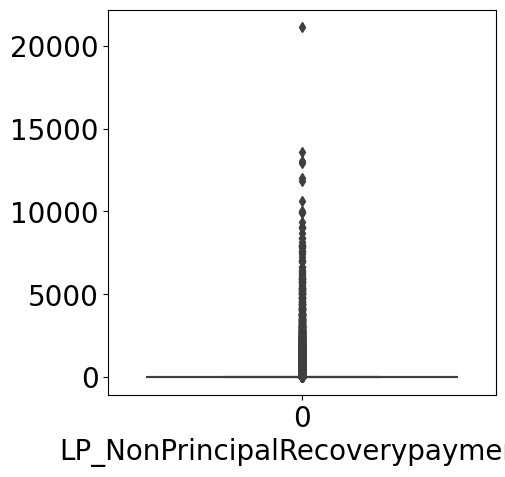

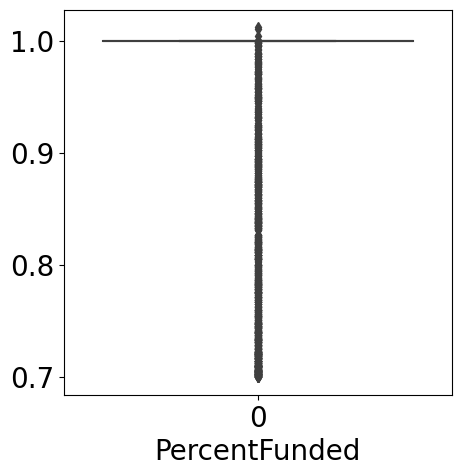

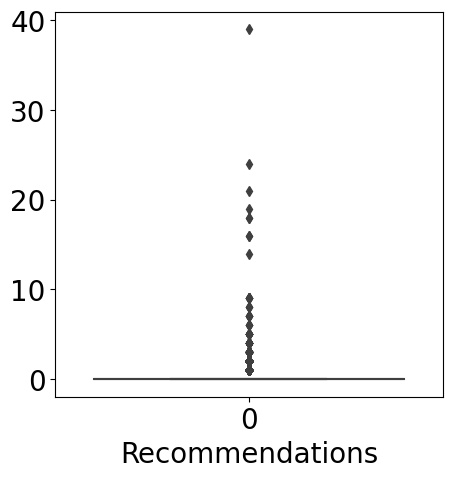

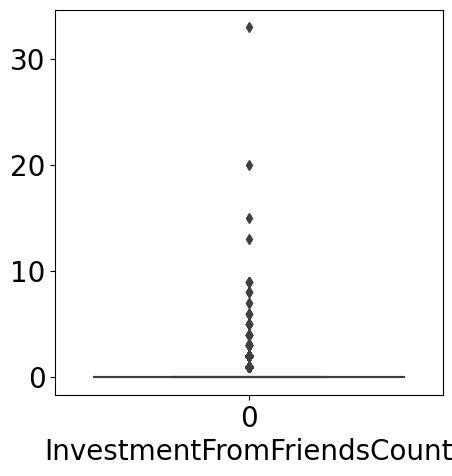

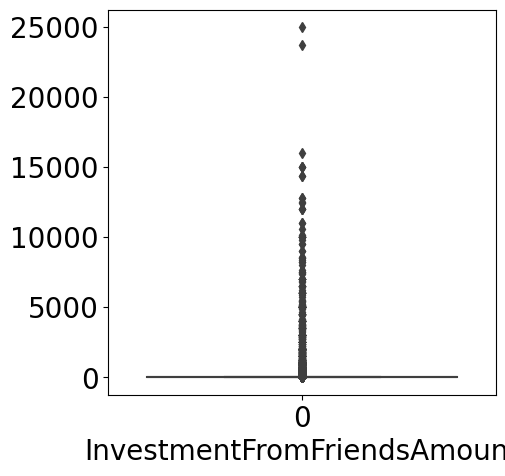

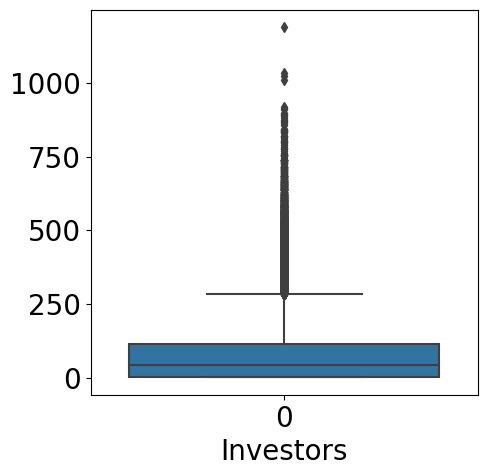

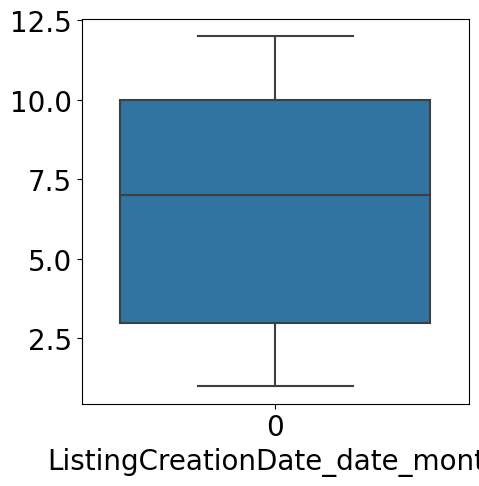

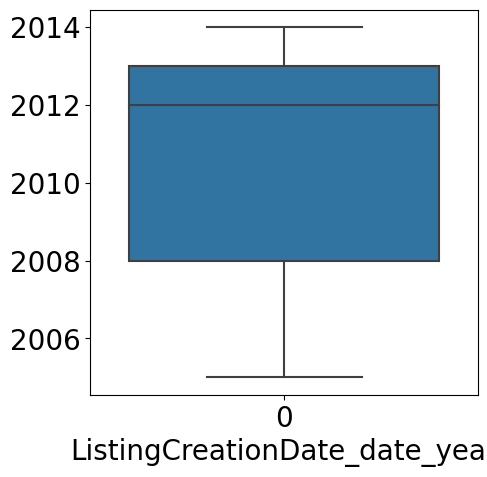

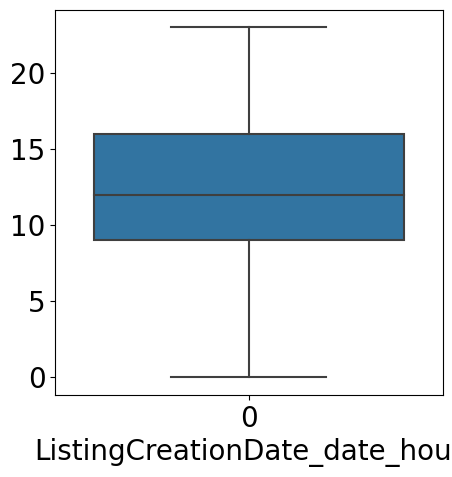

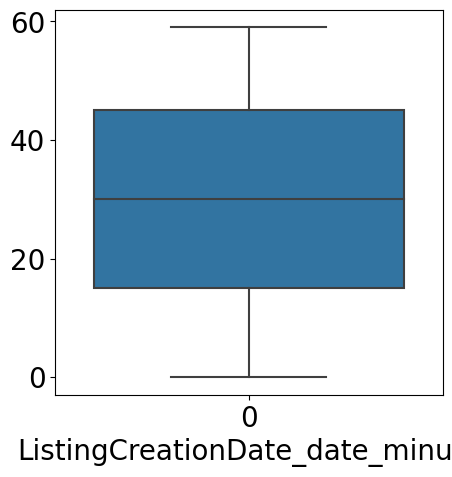

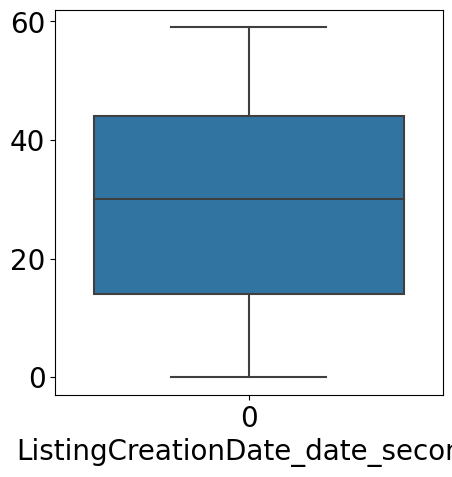

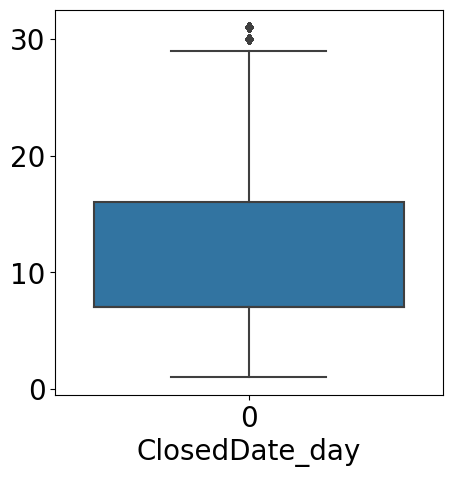

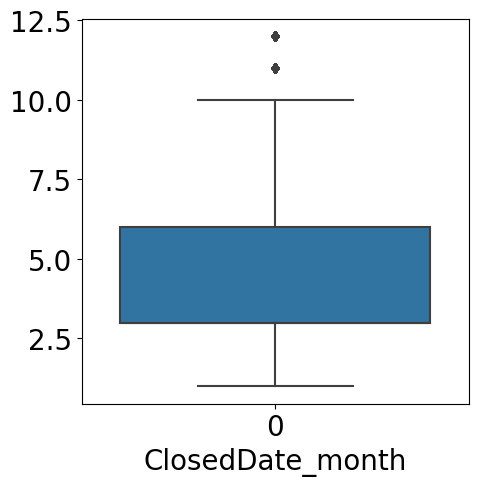

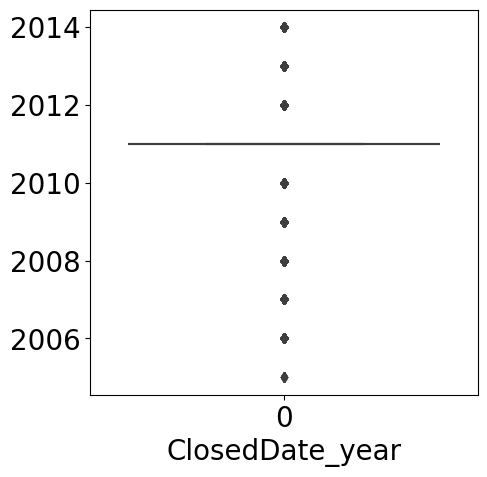

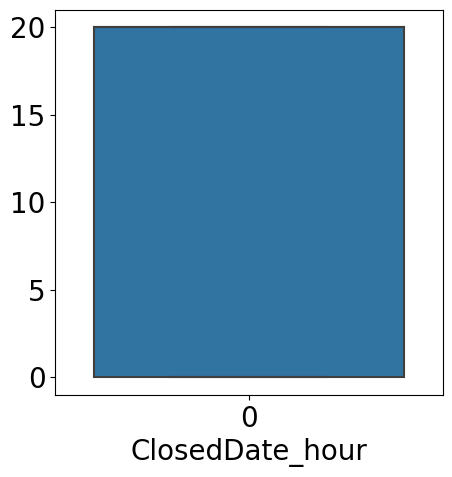

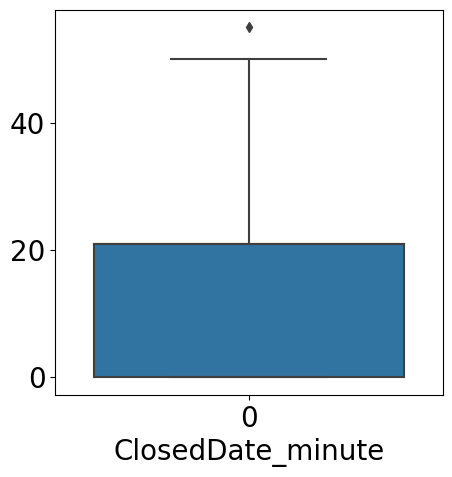

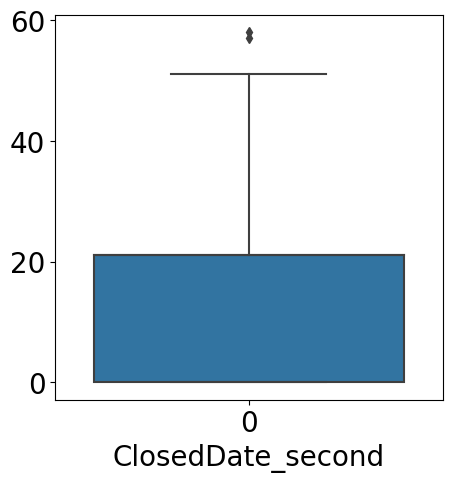

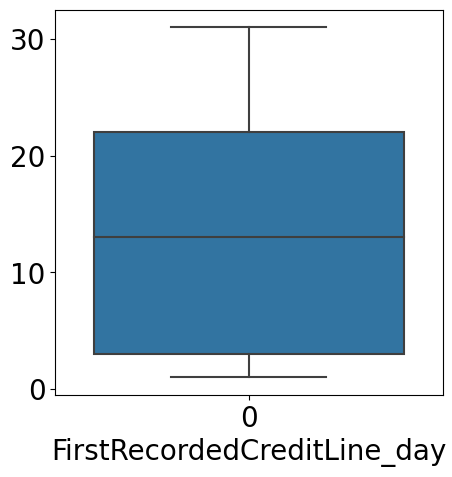

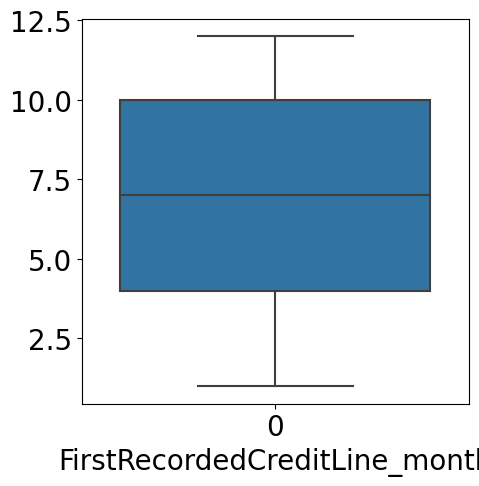

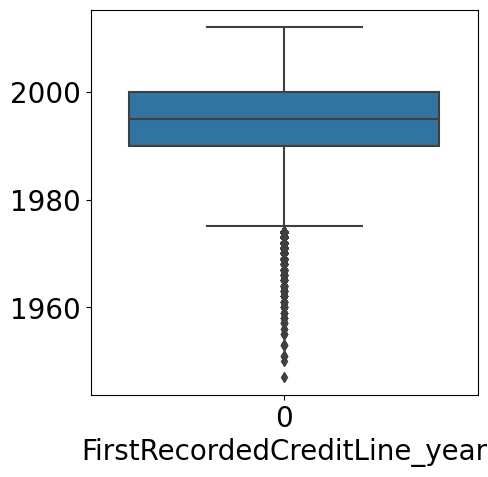

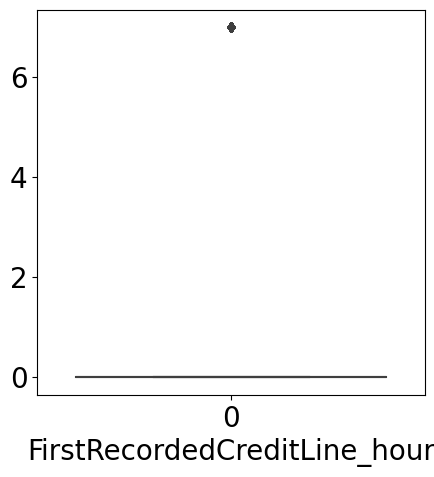

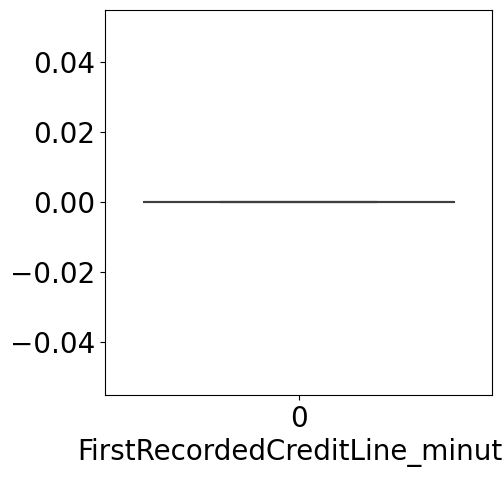

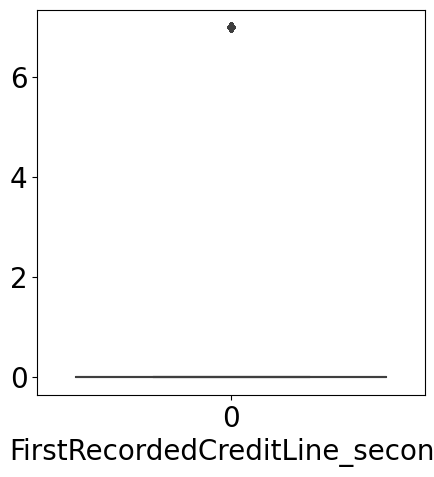

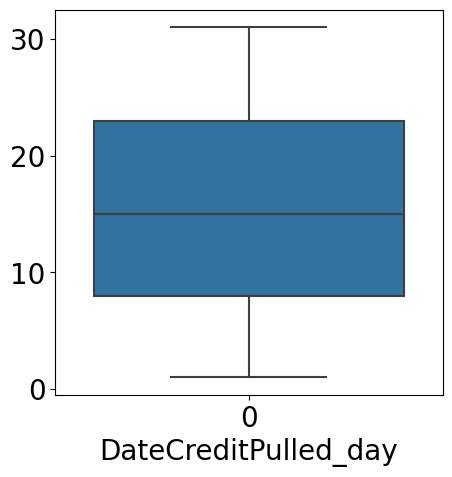

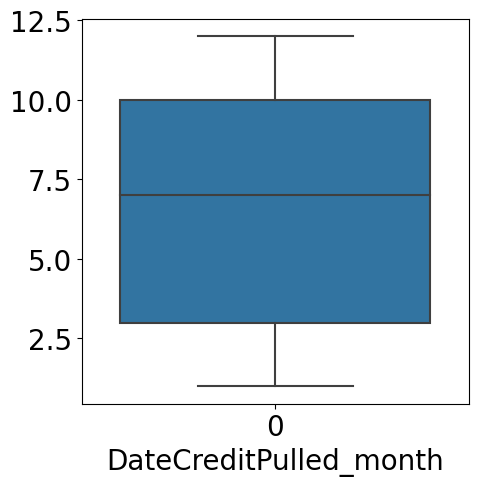

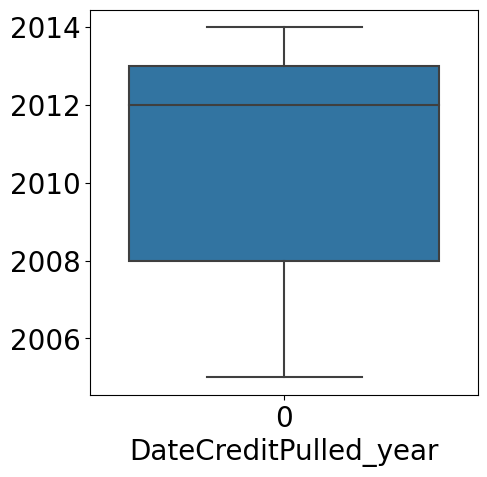

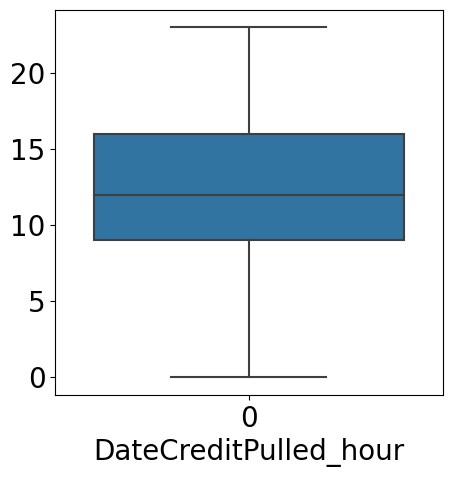

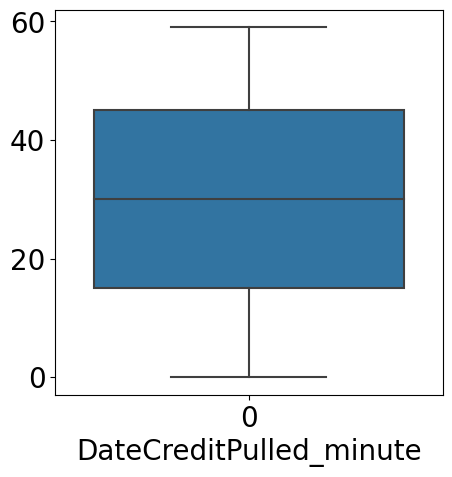

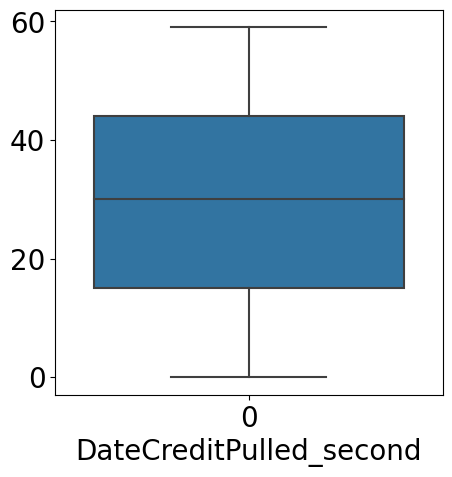

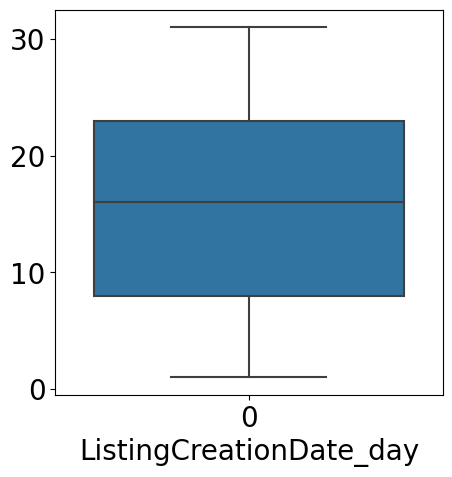

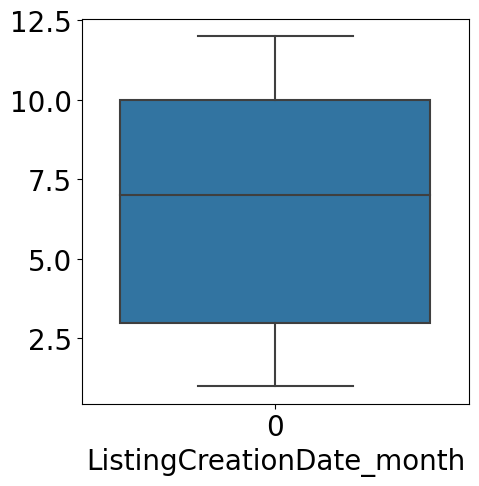

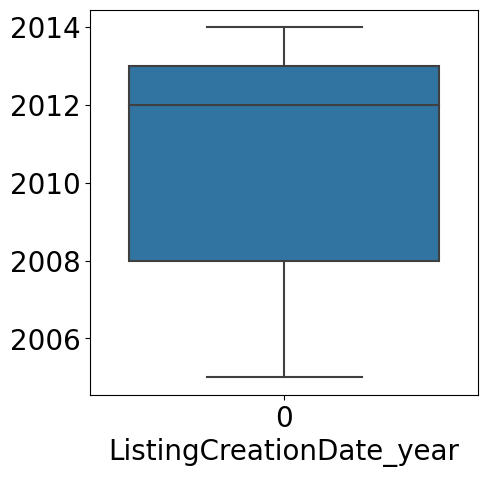

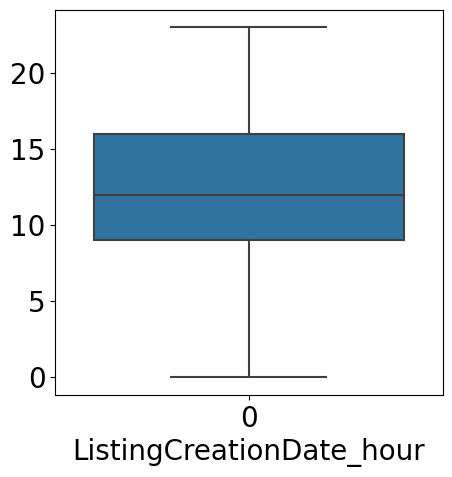

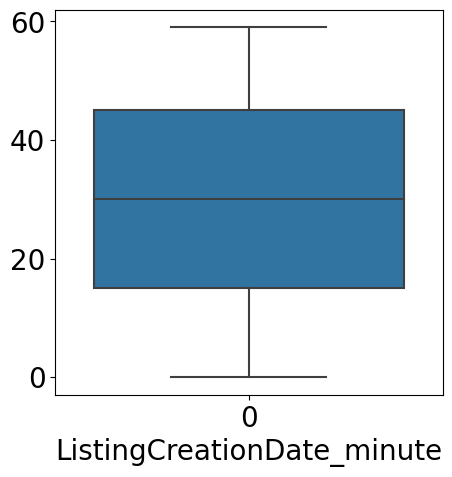

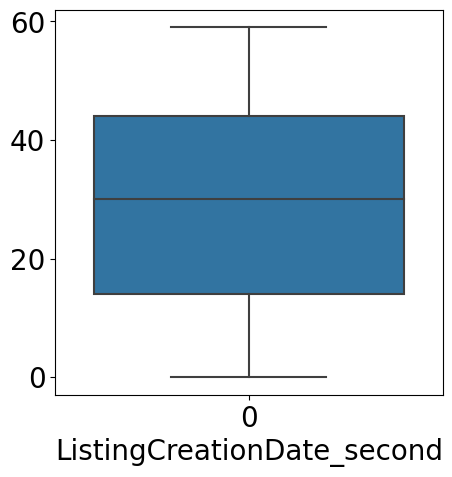

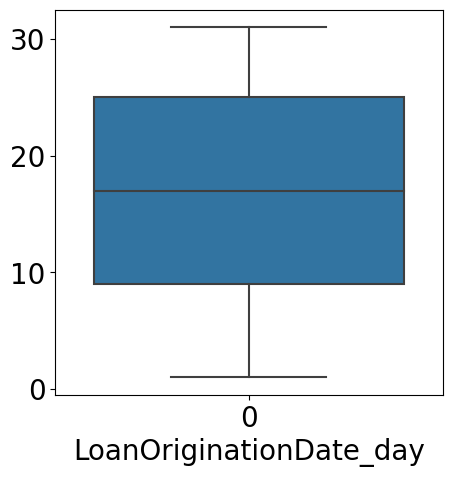

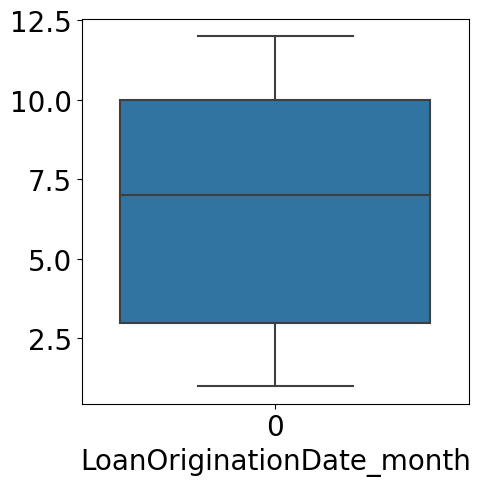

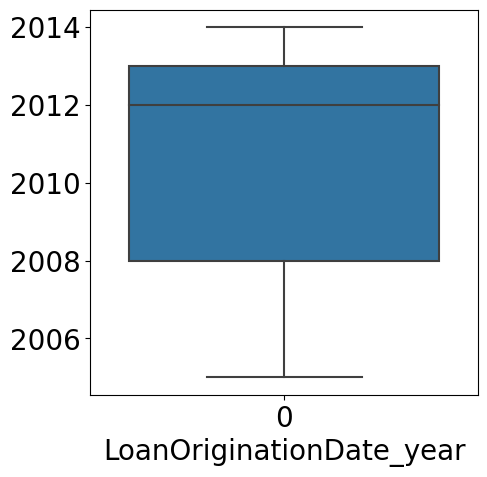

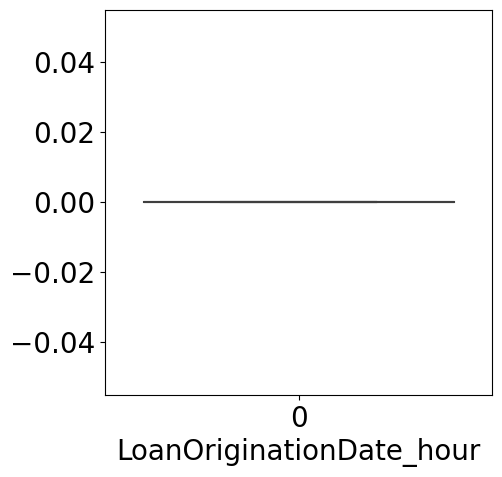

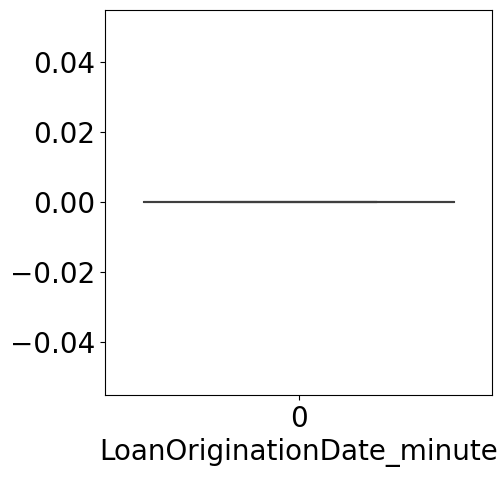

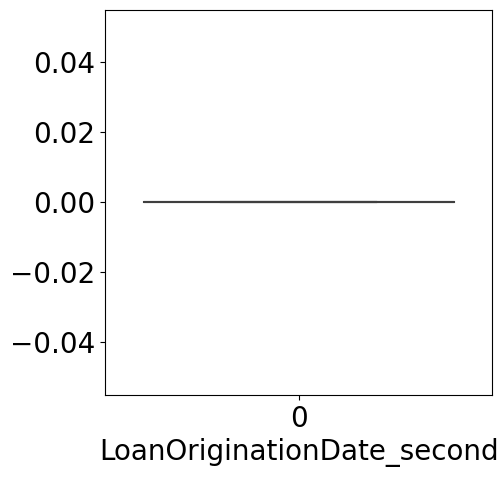

In [525]:

for feature in features :
    fig = plt.subplots(figsize=(5, 5))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.show()
   

In [526]:
#Let's try get ride of outliers!
new_data=data.drop(["LoanStatus"],axis=1)
new_data=data.drop(["CreditGrade"],axis=1)
new_data=data.drop(["CurrentlyInGroup"],axis=1)

for x in (new_data):
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min


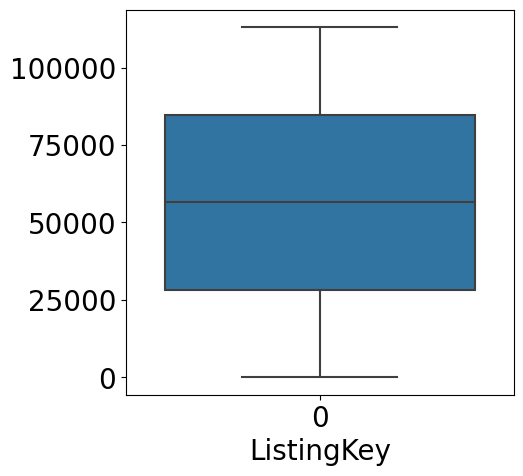

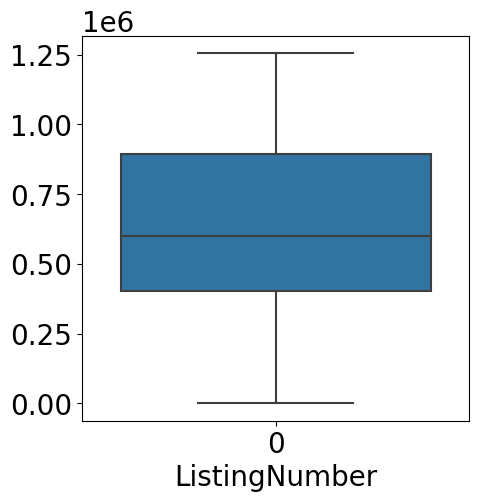

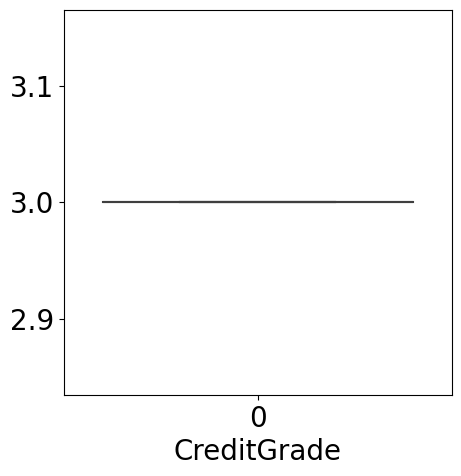

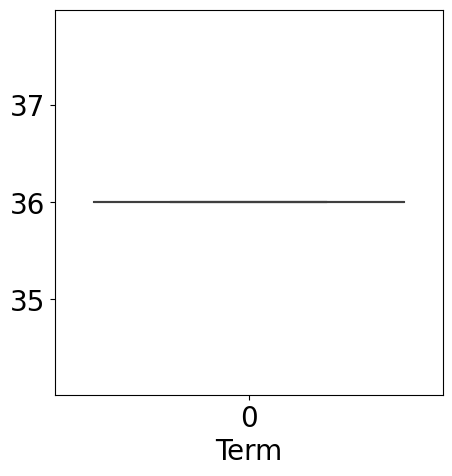

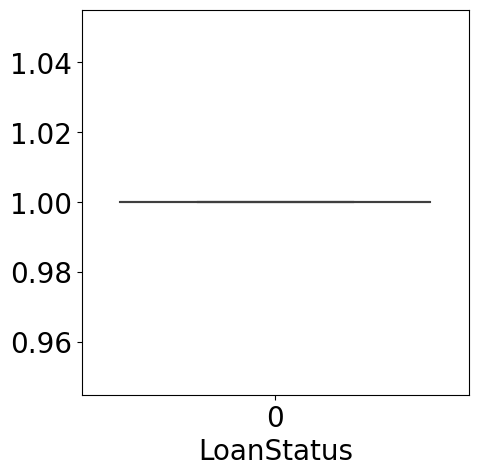

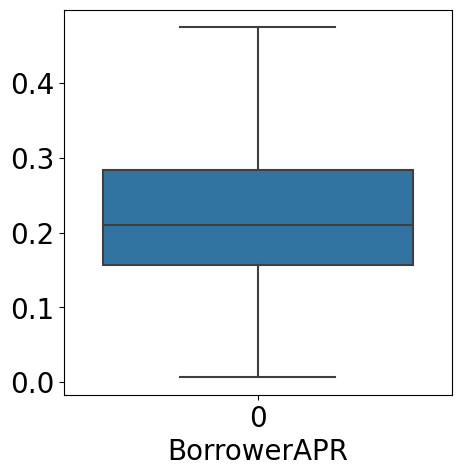

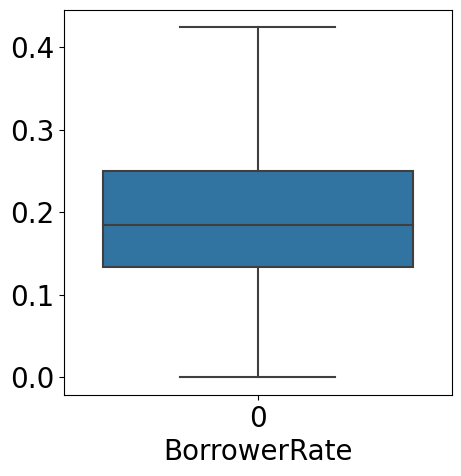

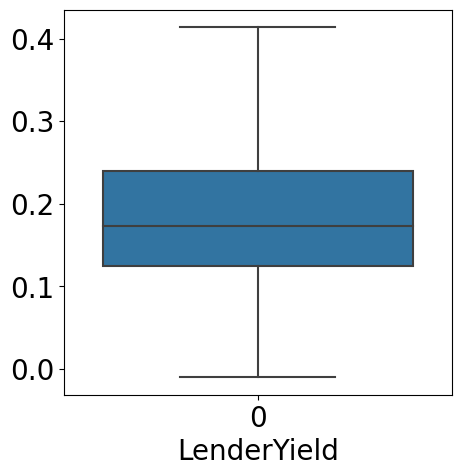

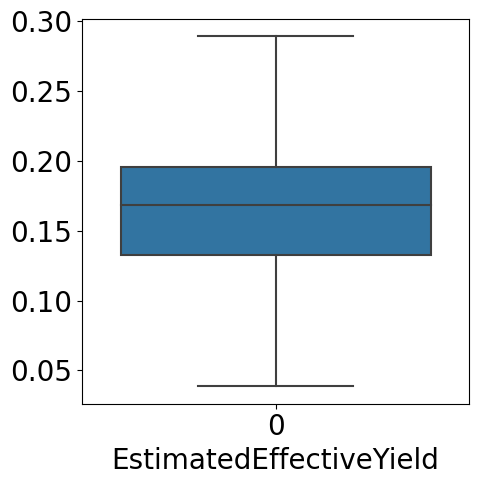

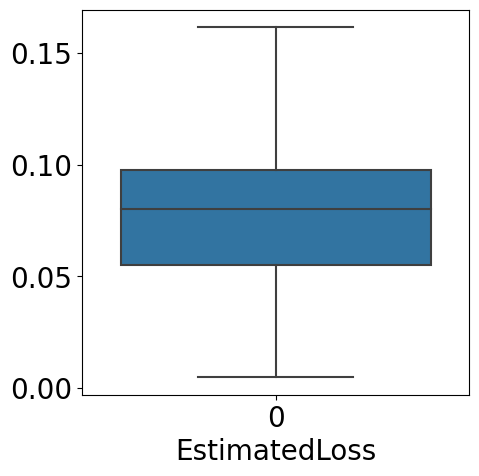

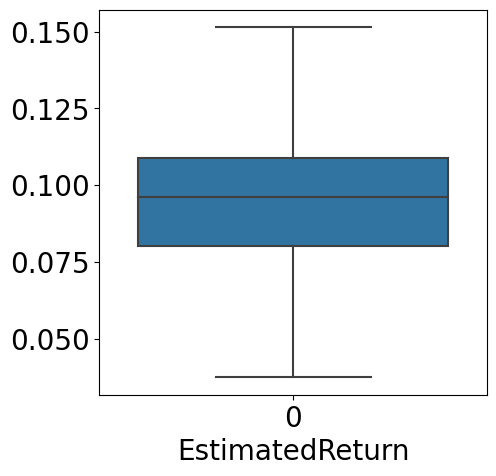

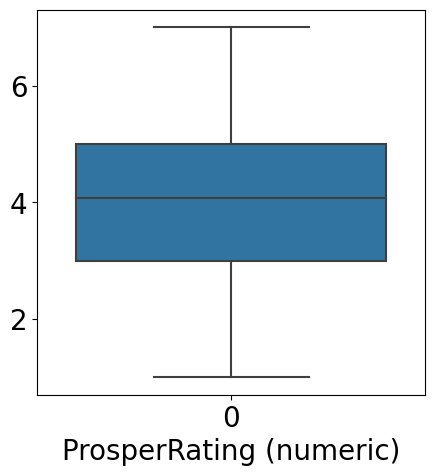

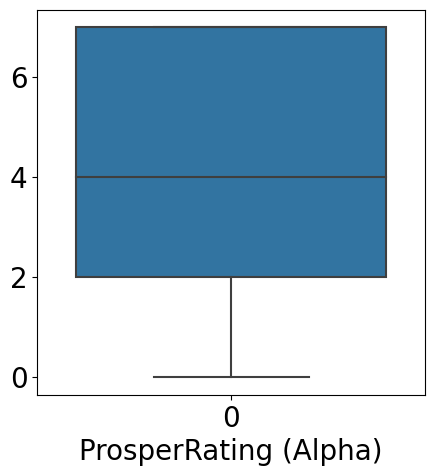

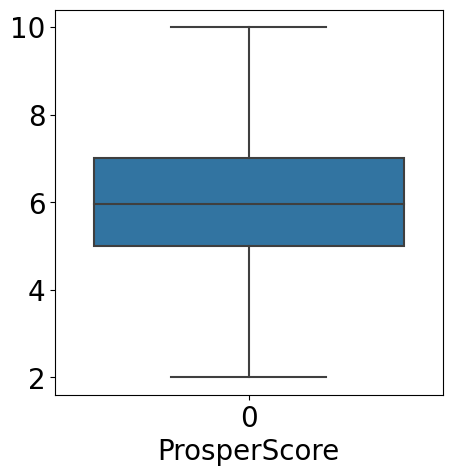

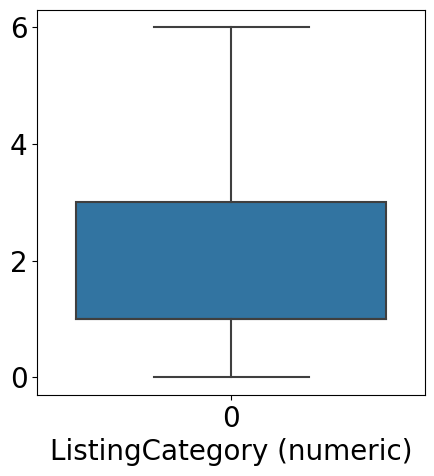

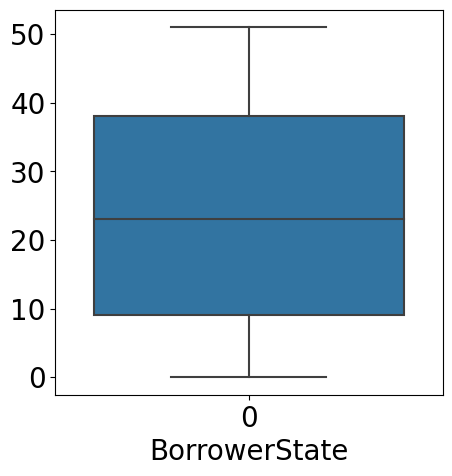

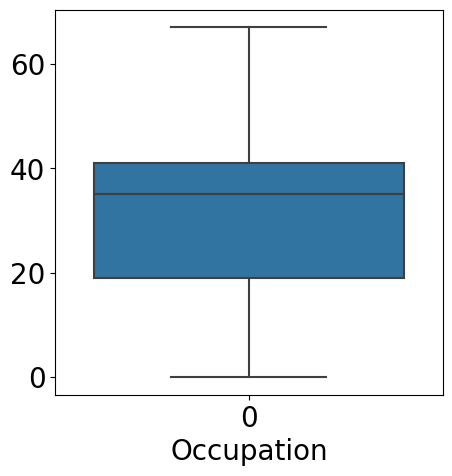

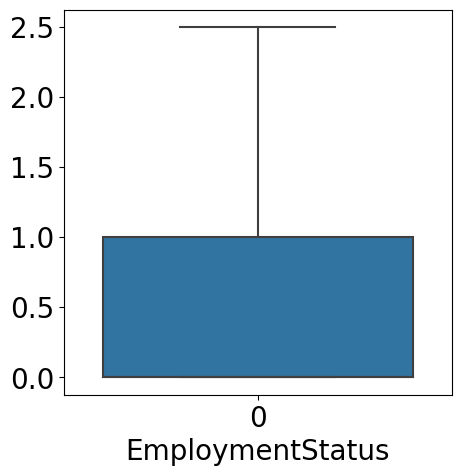

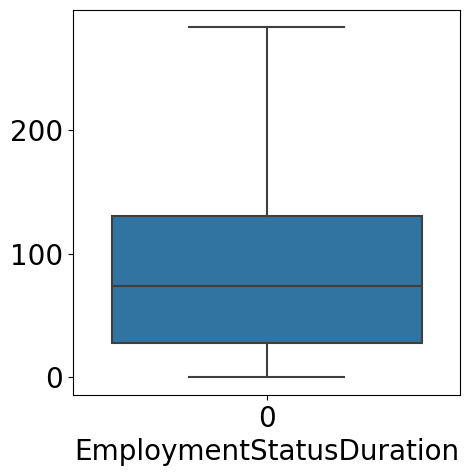

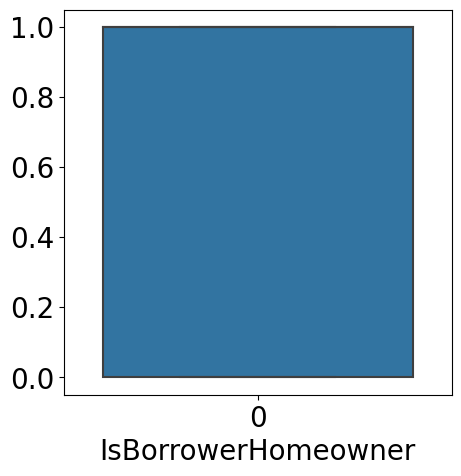

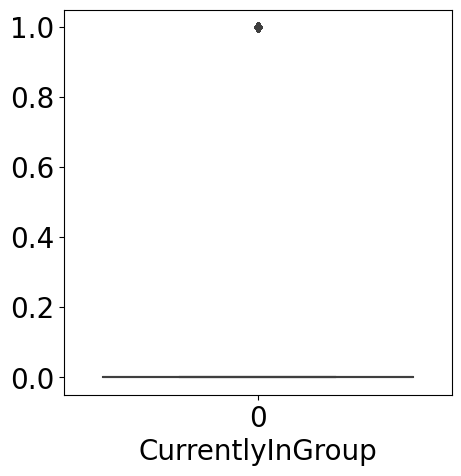

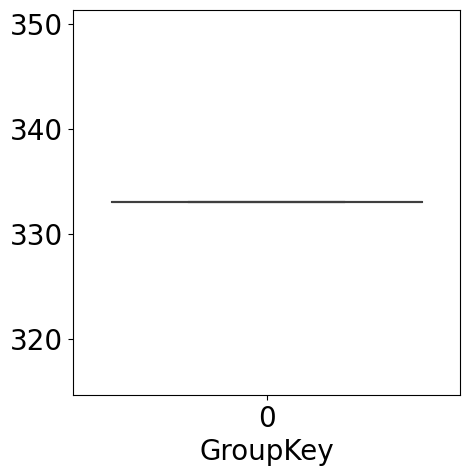

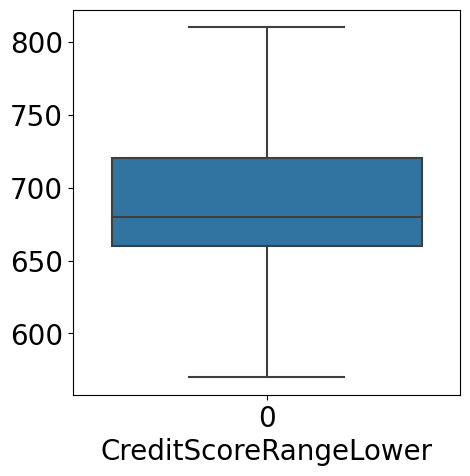

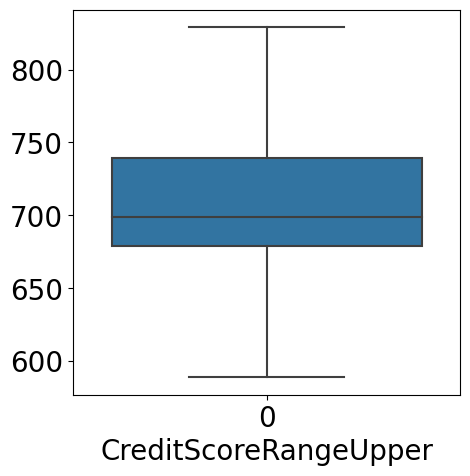

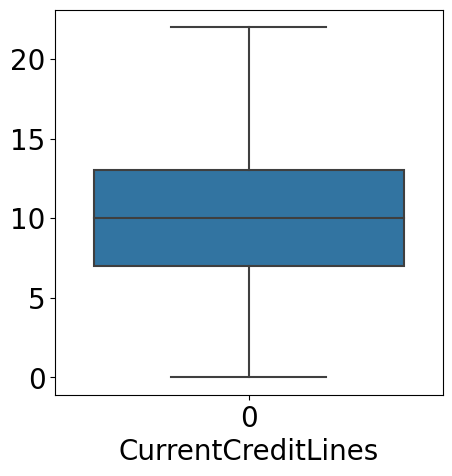

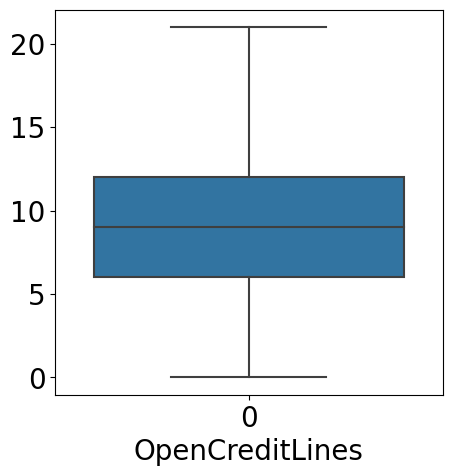

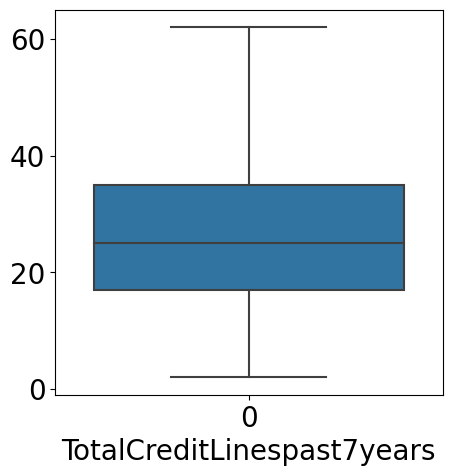

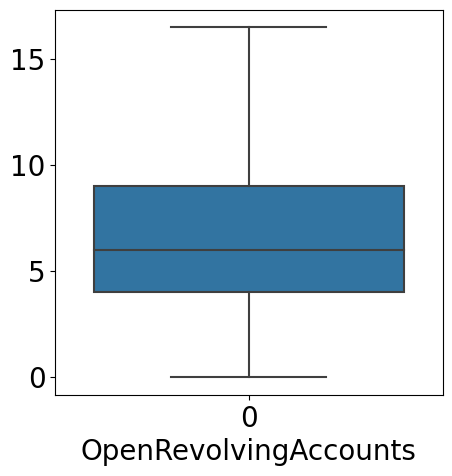

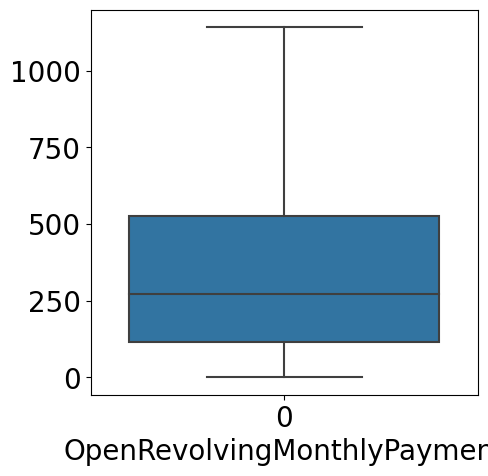

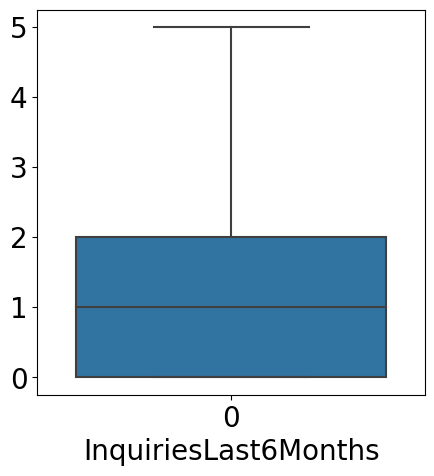

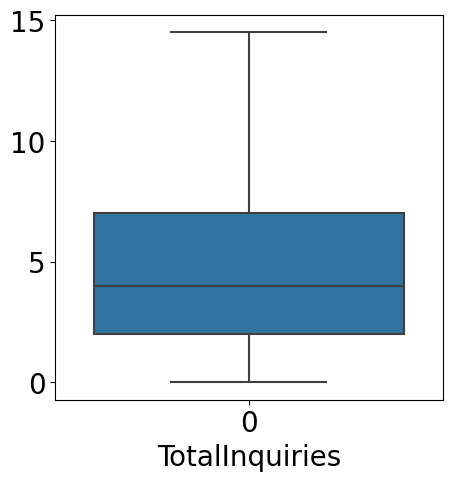

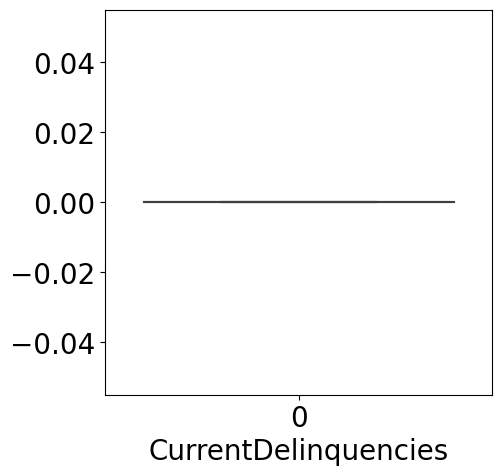

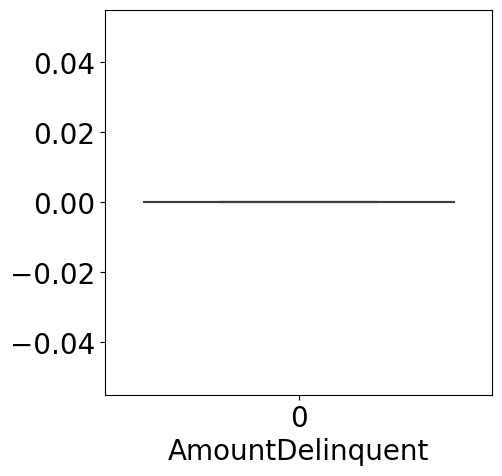

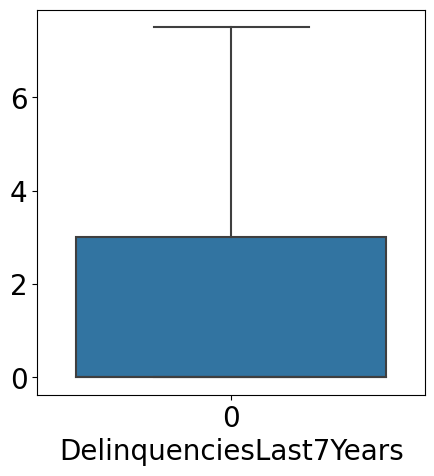

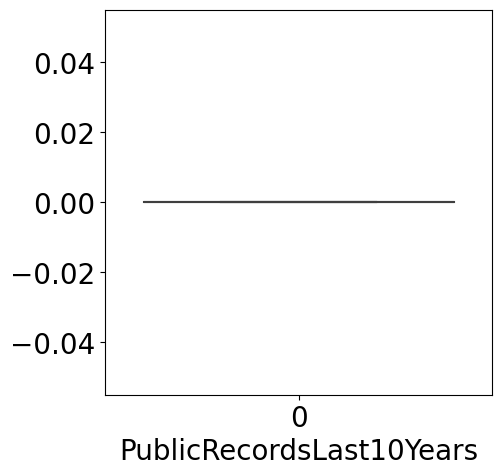

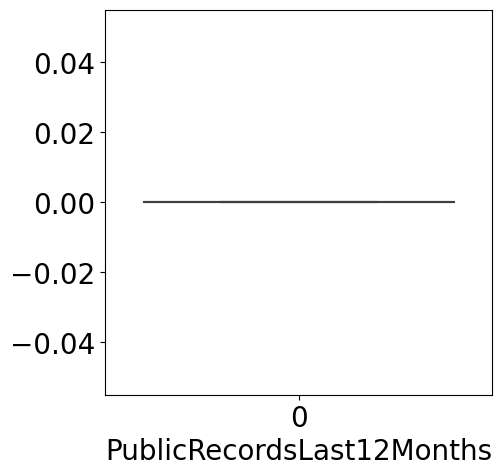

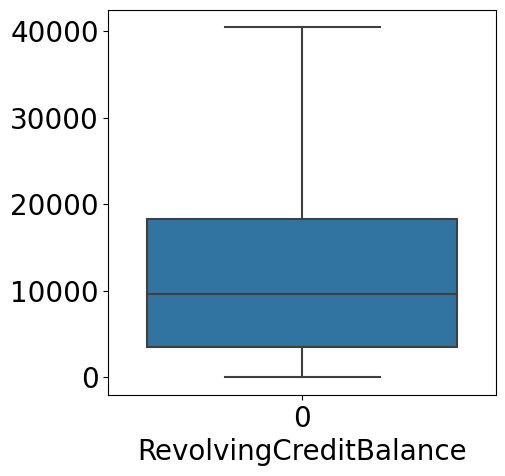

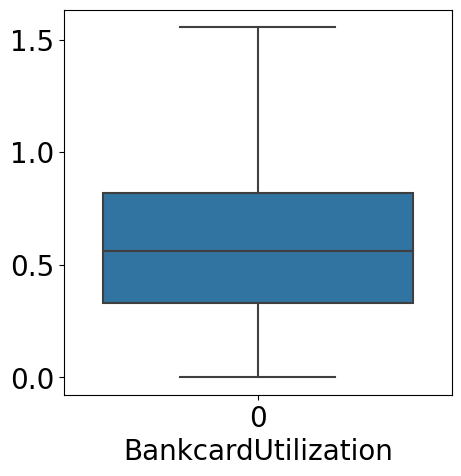

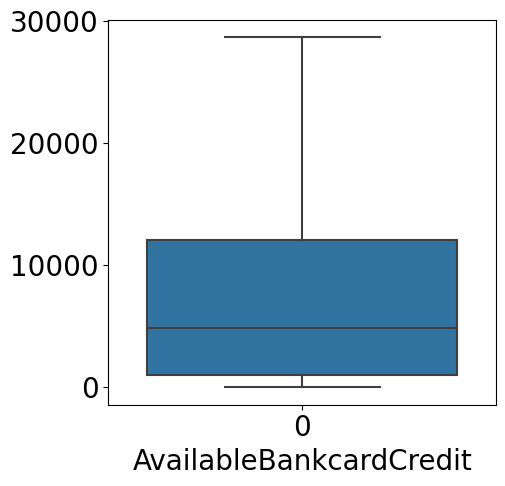

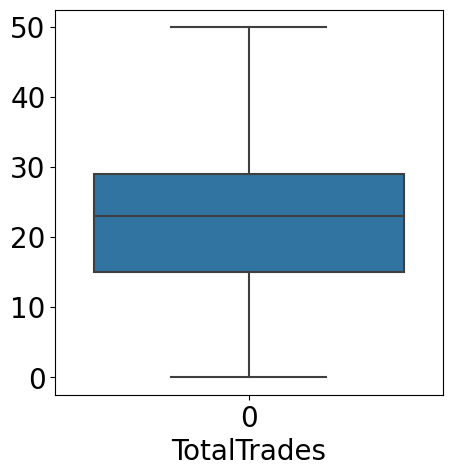

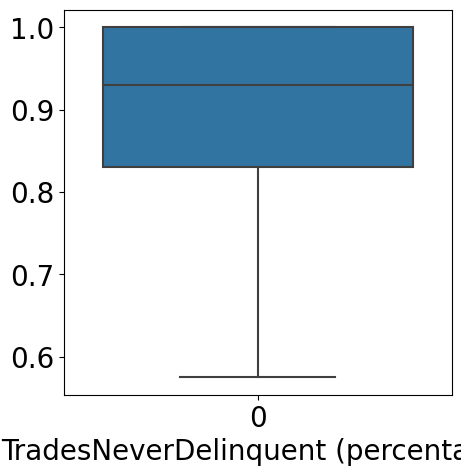

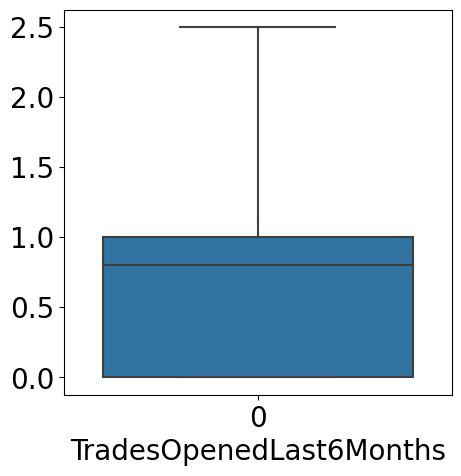

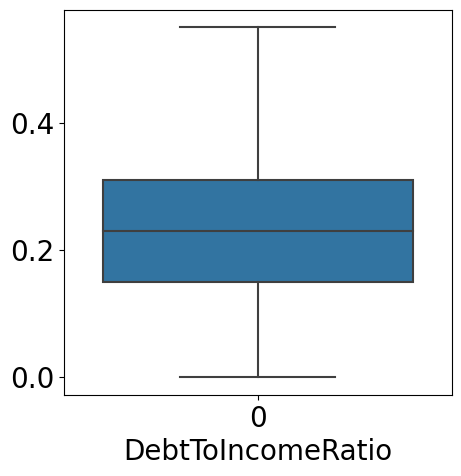

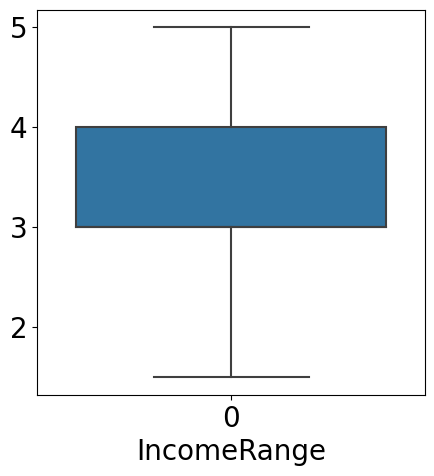

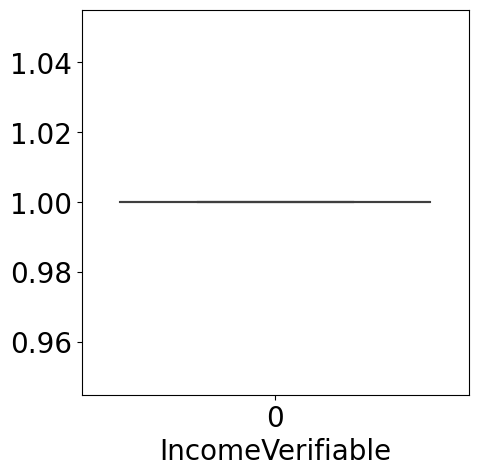

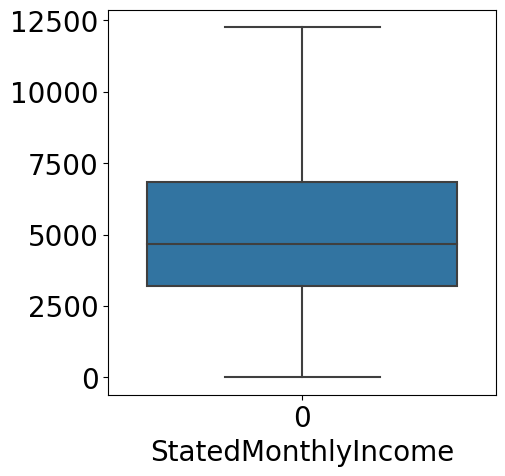

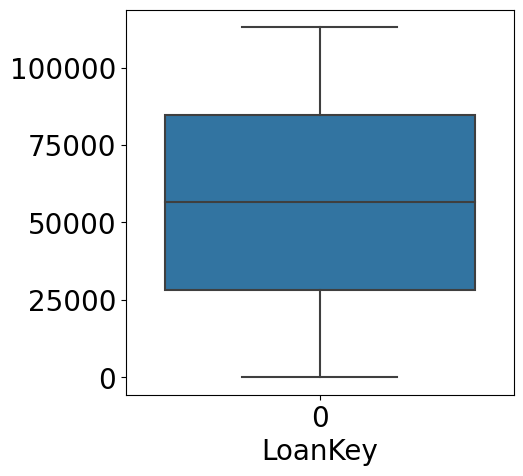

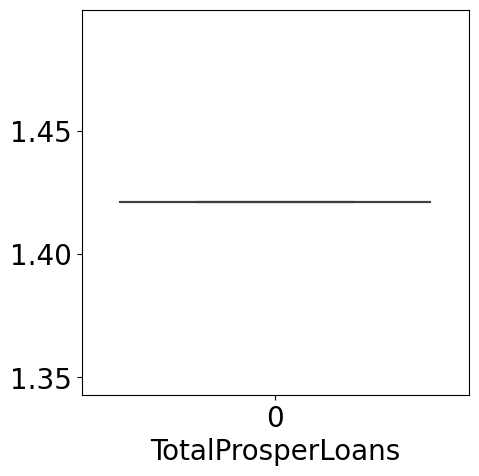

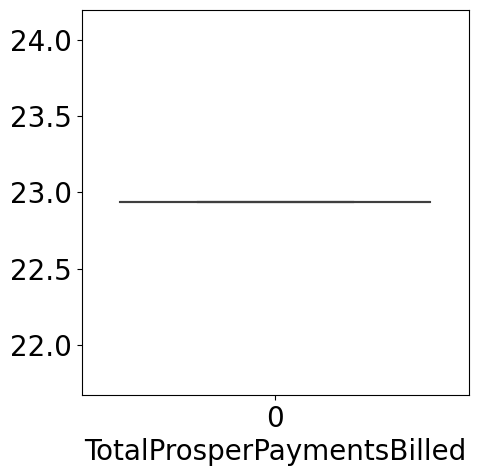

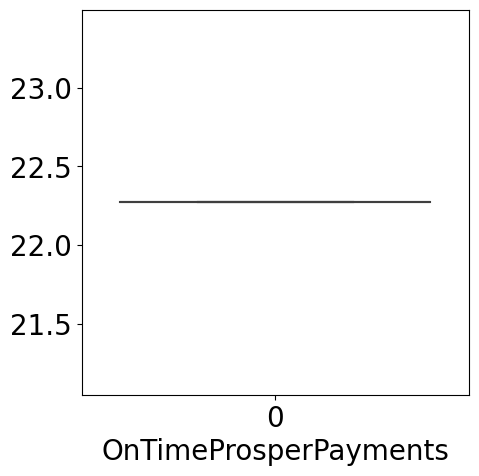

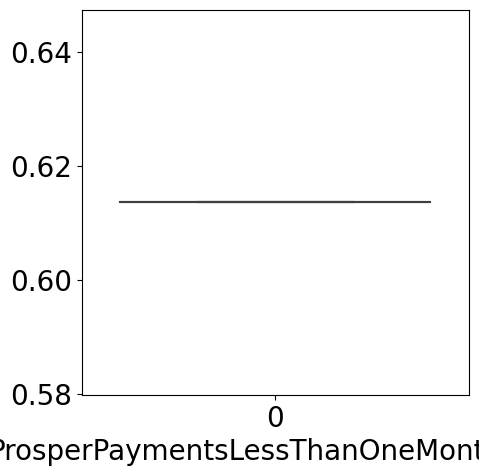

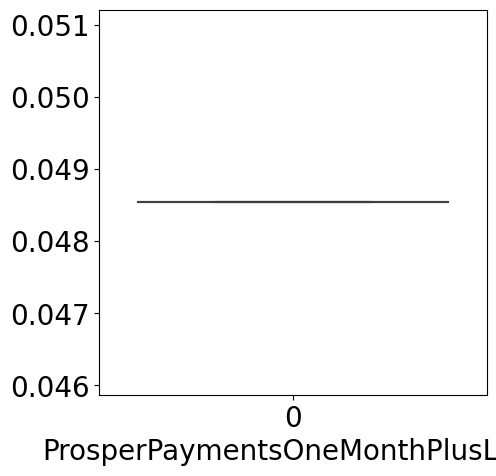

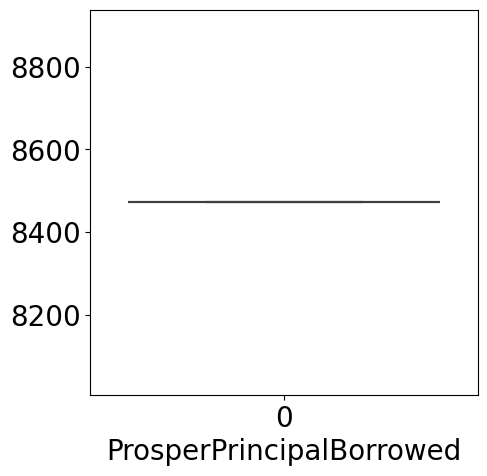

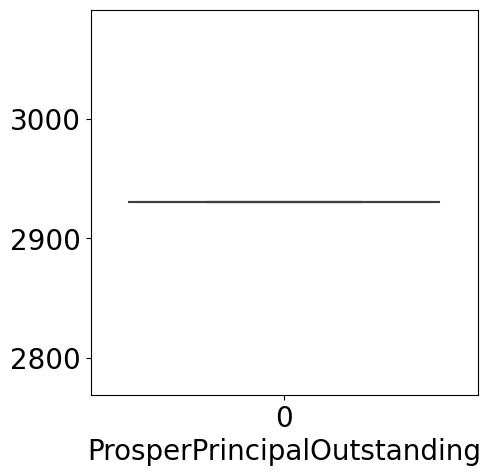

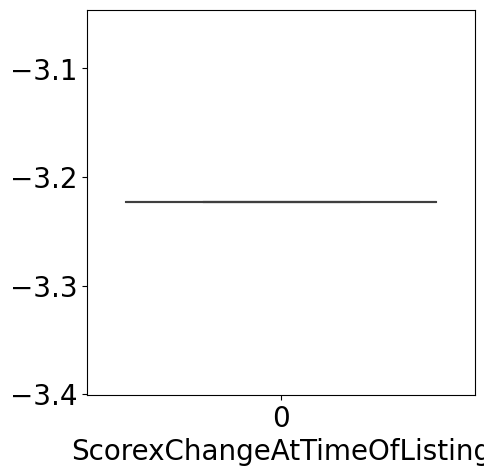

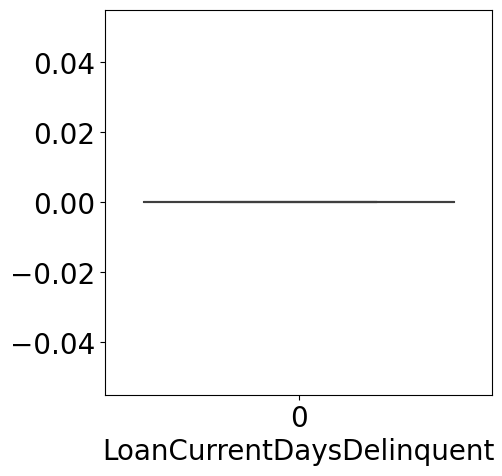

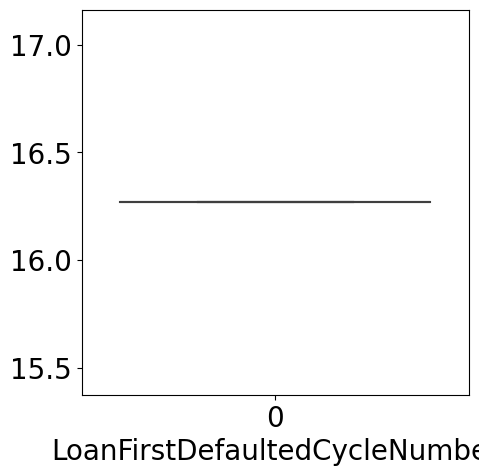

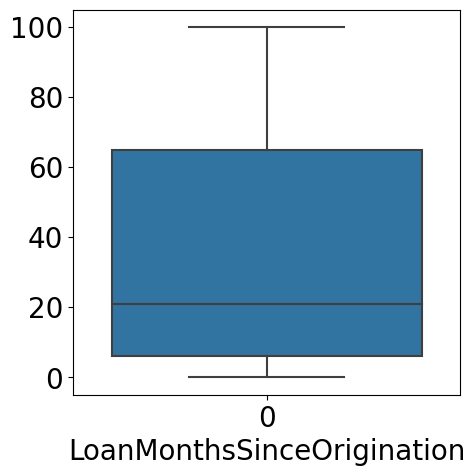

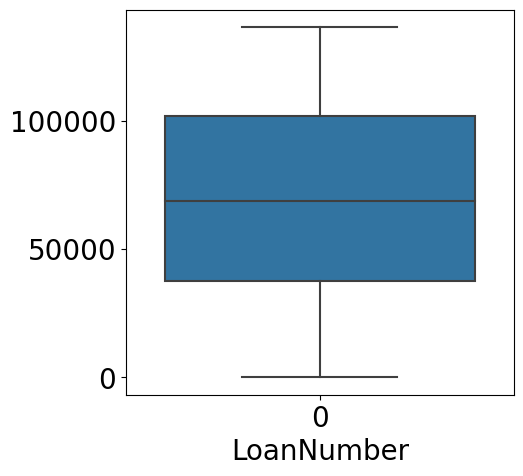

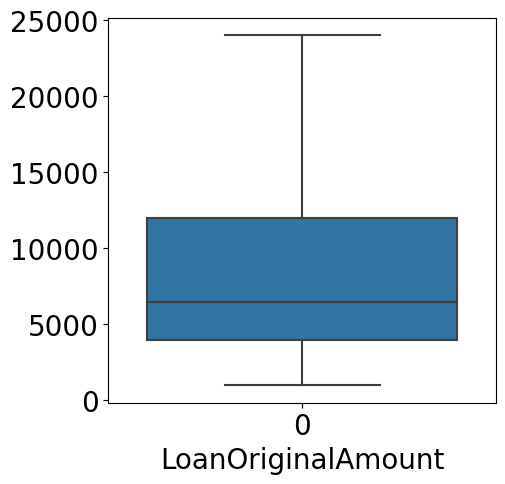

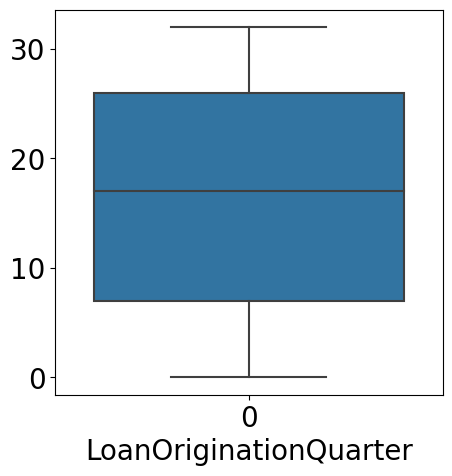

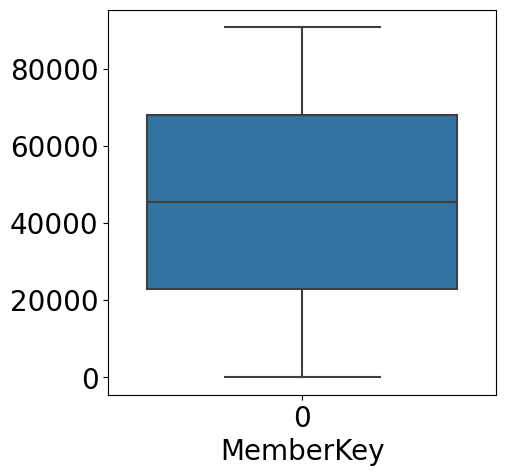

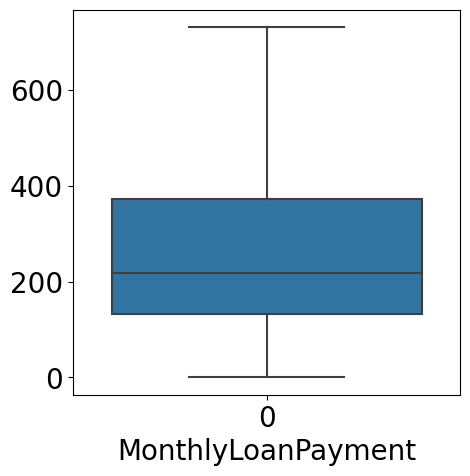

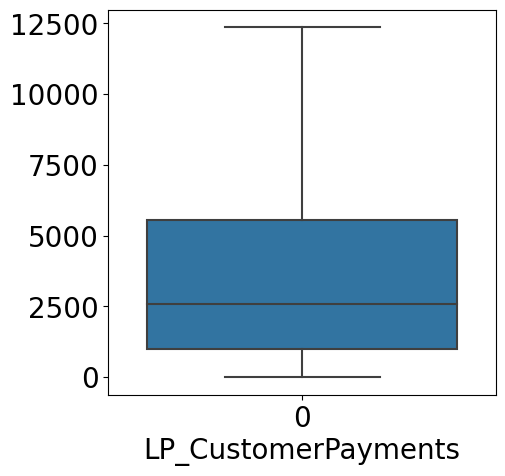

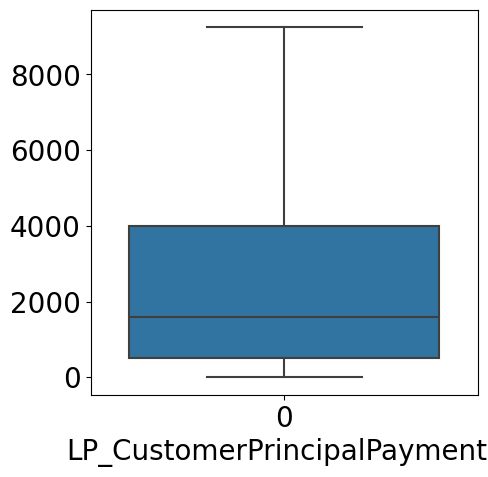

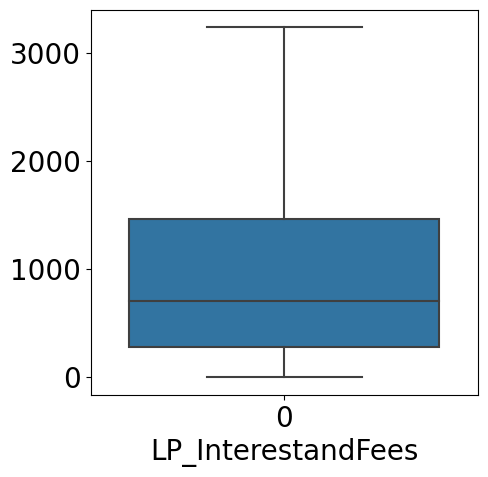

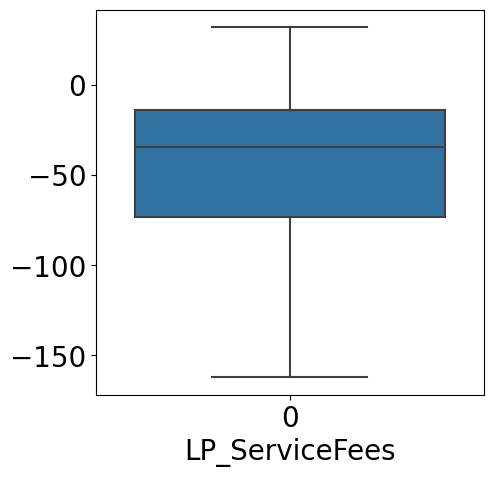

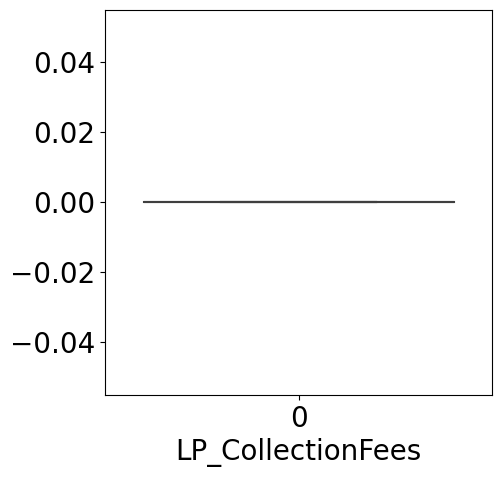

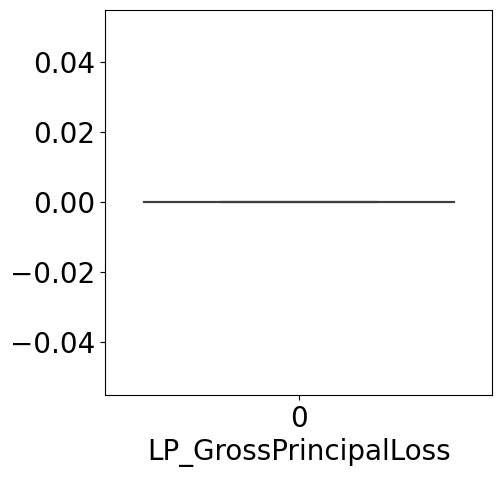

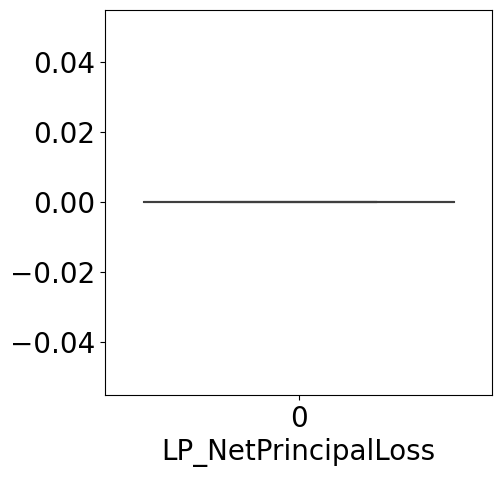

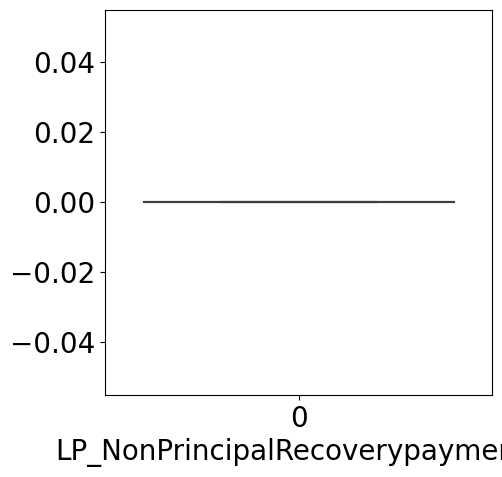

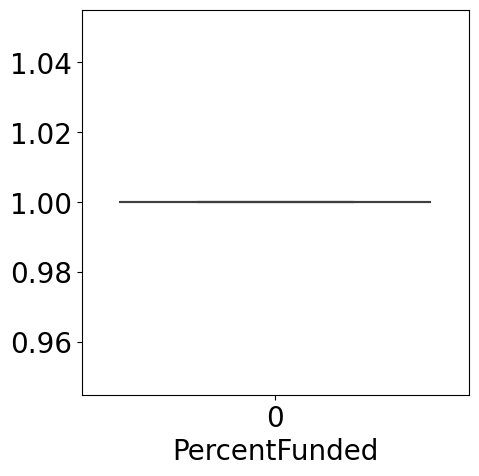

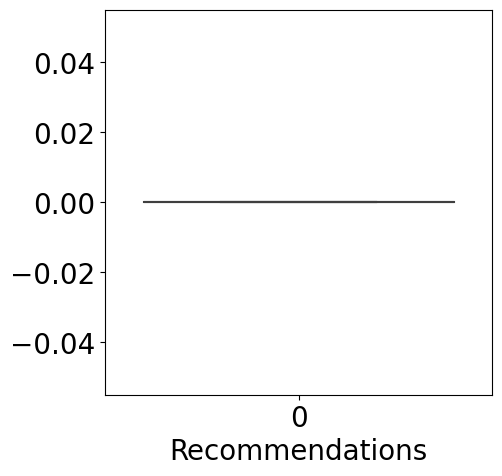

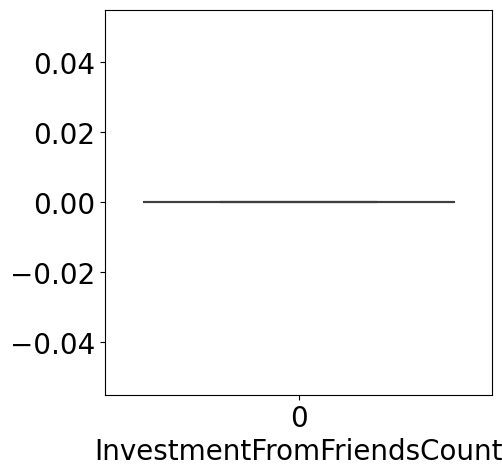

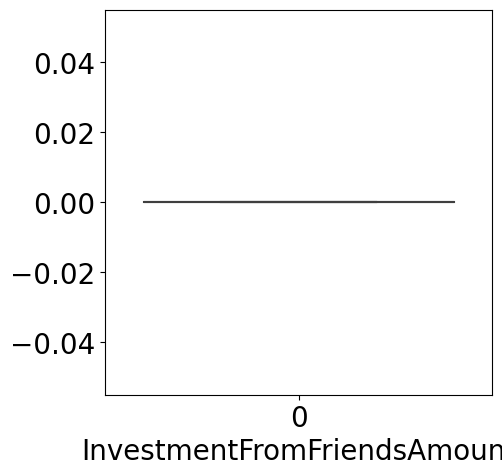

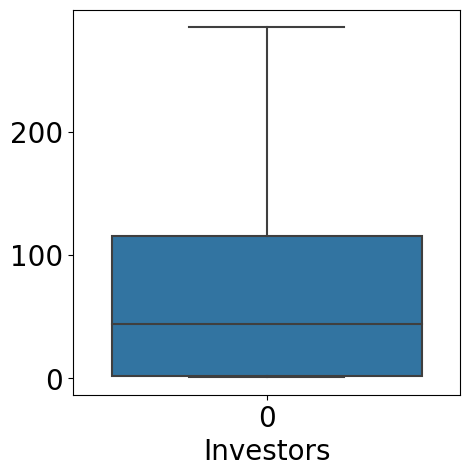

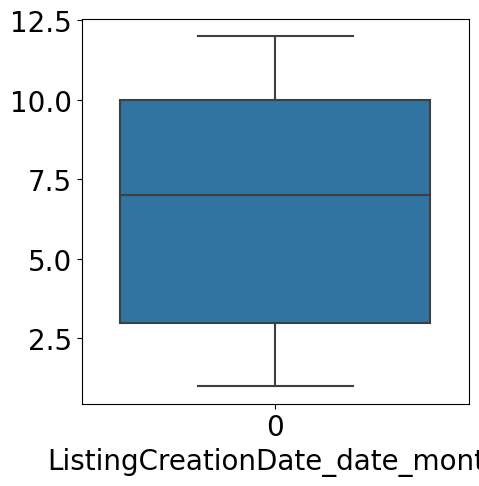

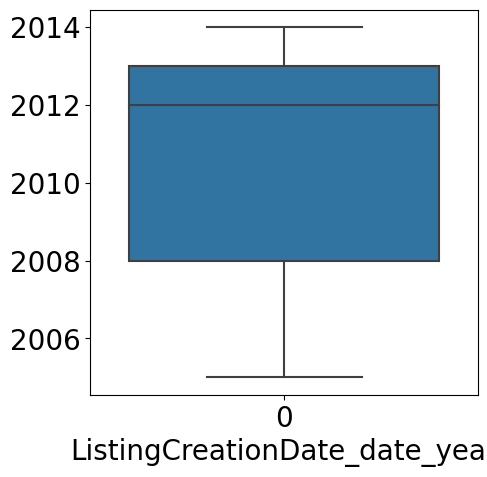

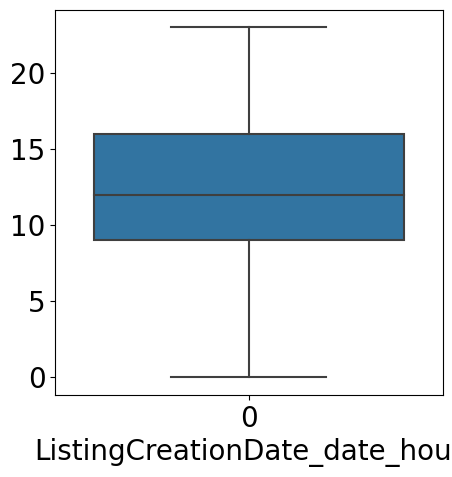

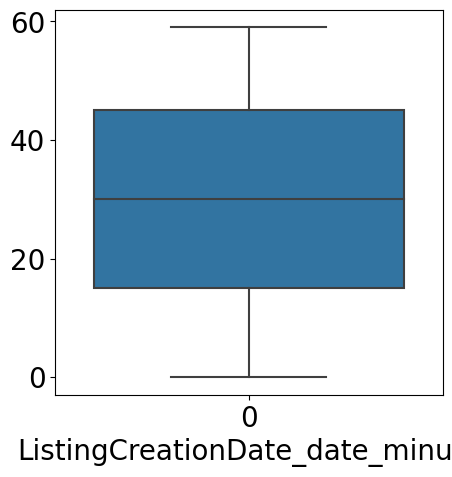

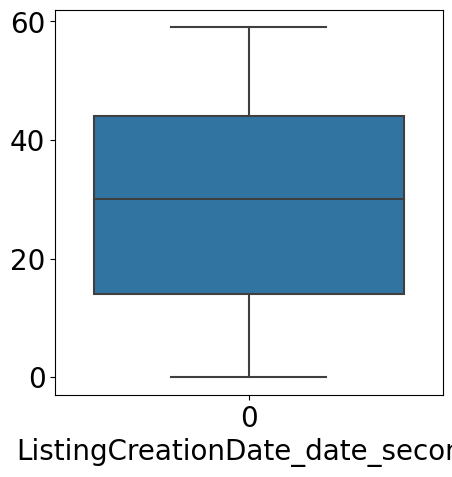

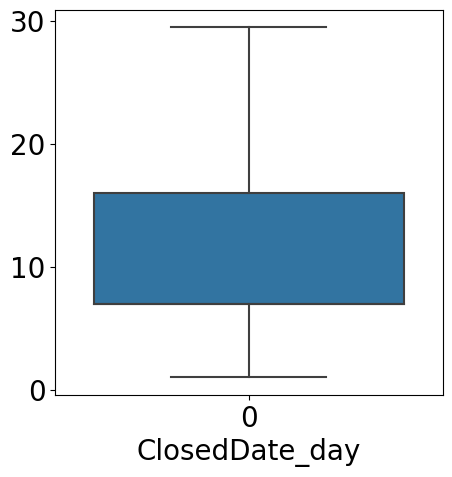

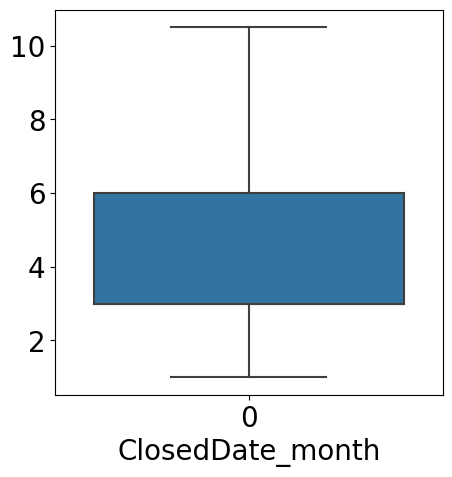

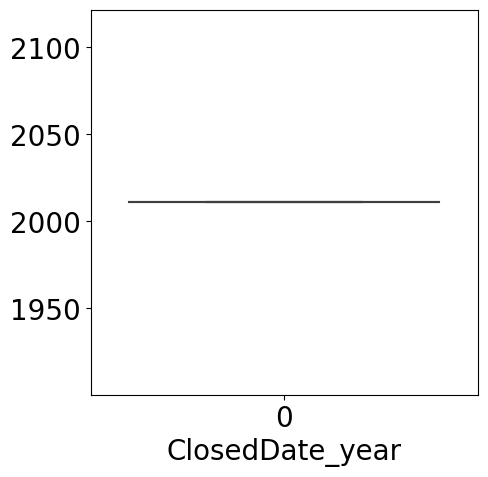

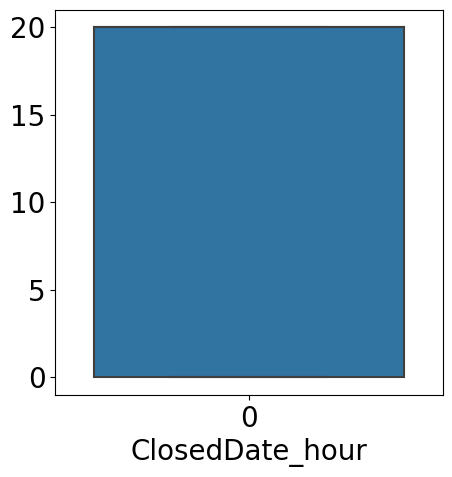

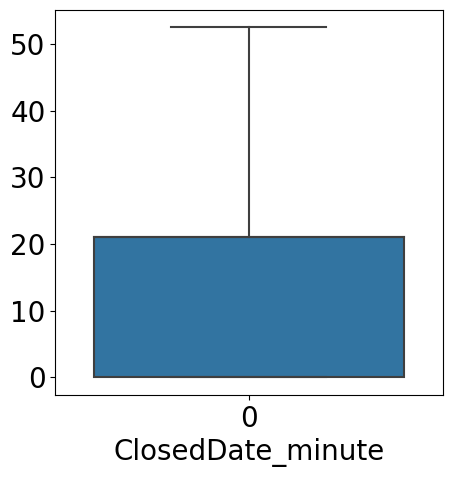

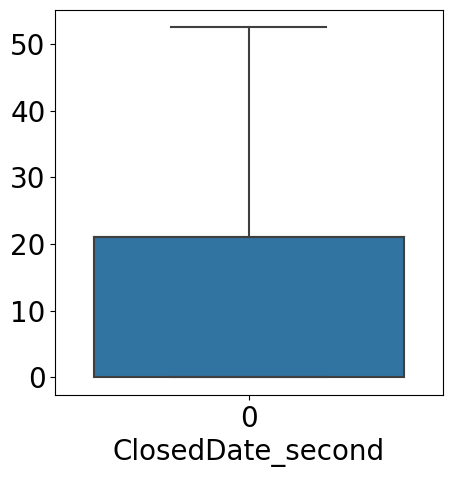

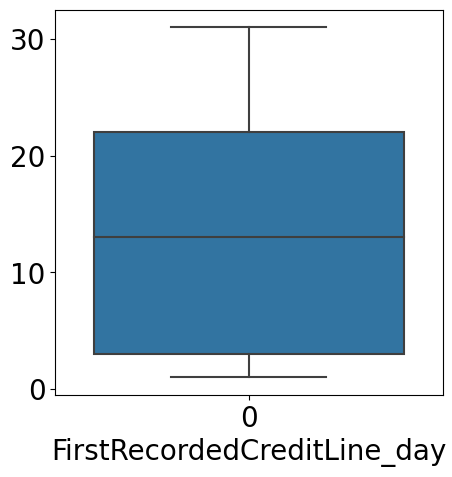

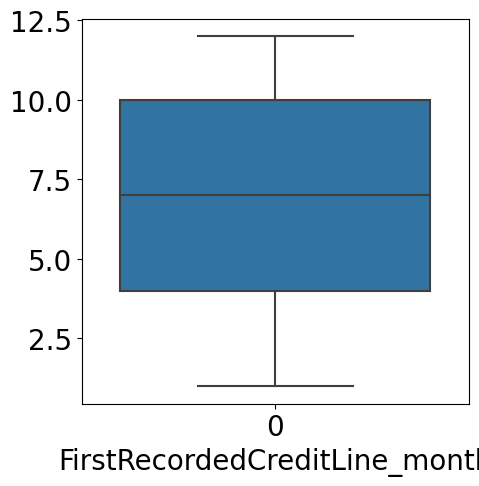

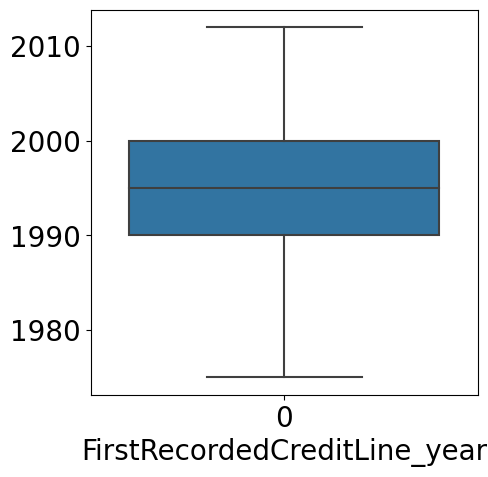

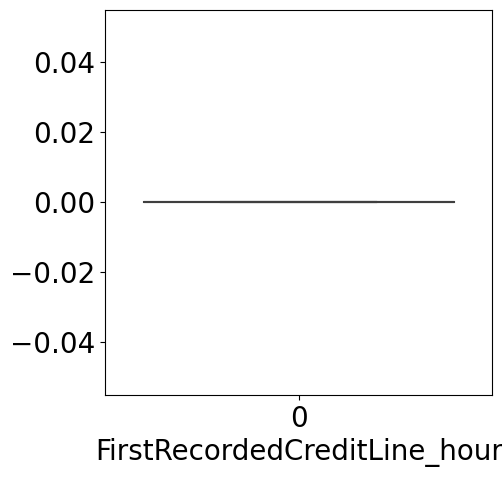

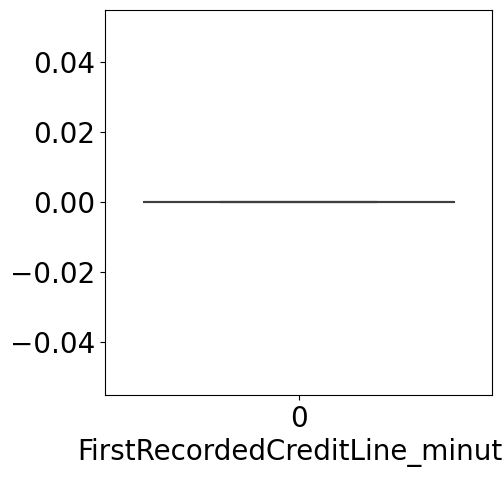

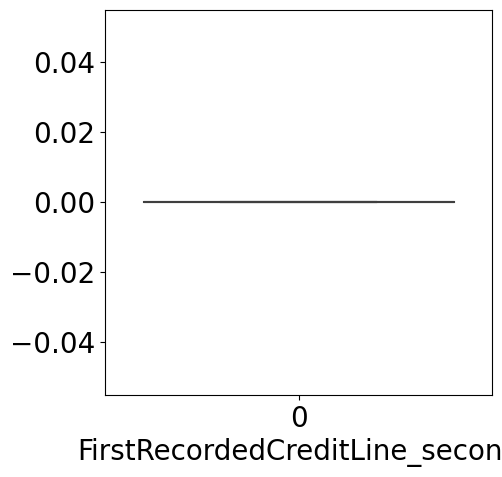

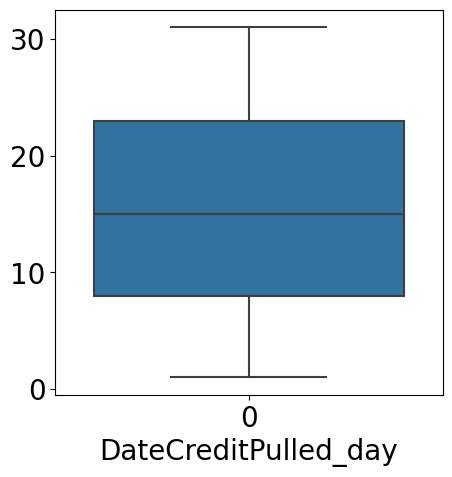

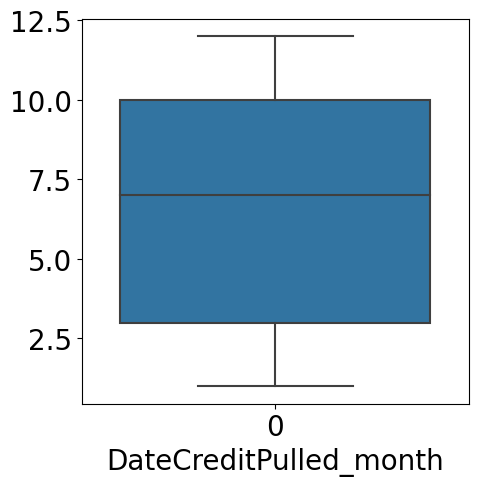

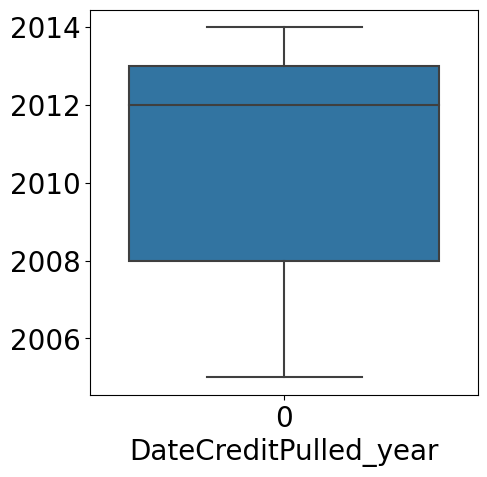

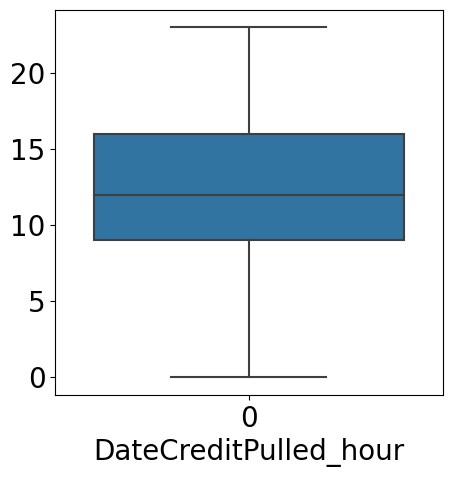

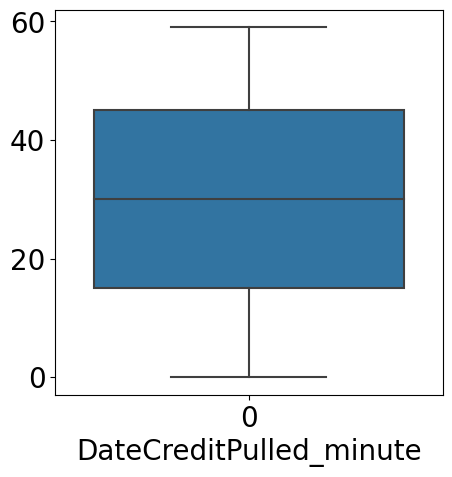

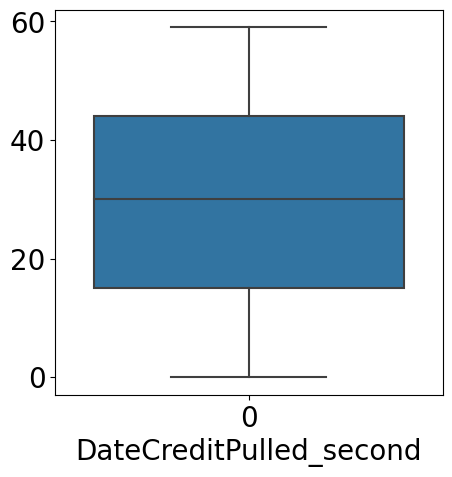

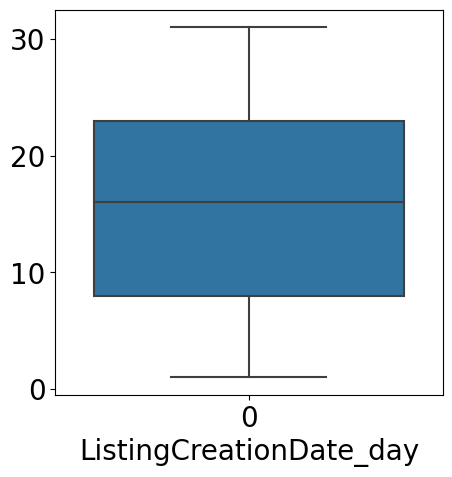

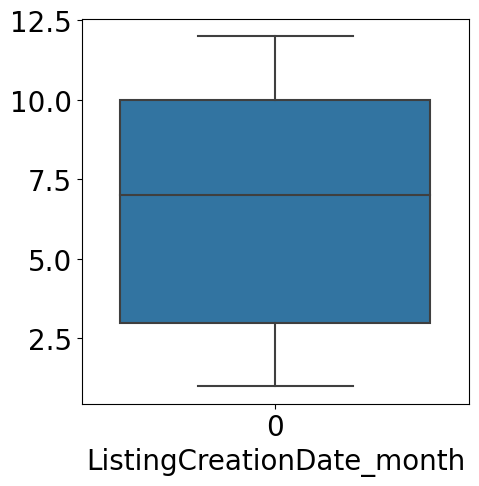

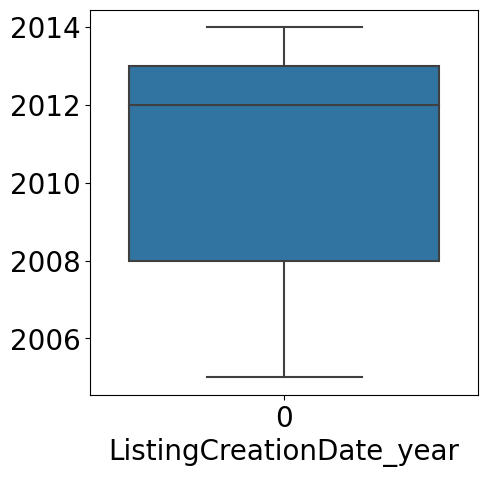

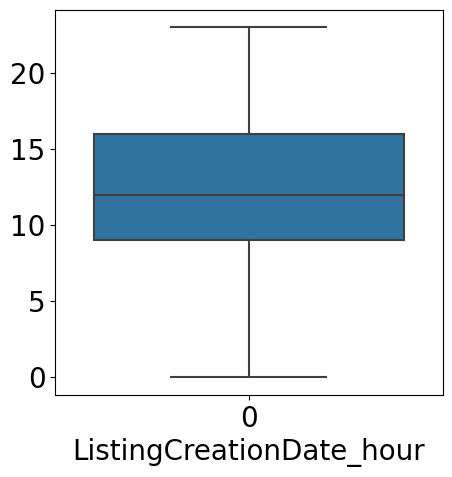

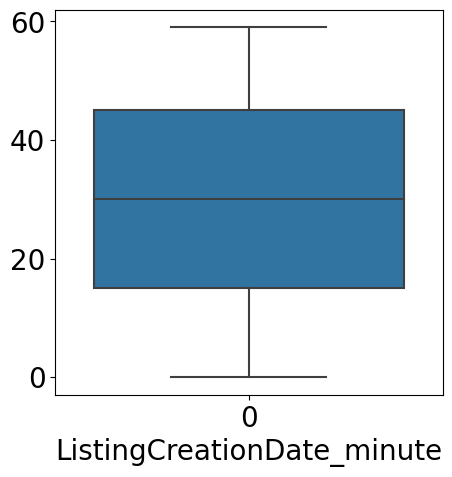

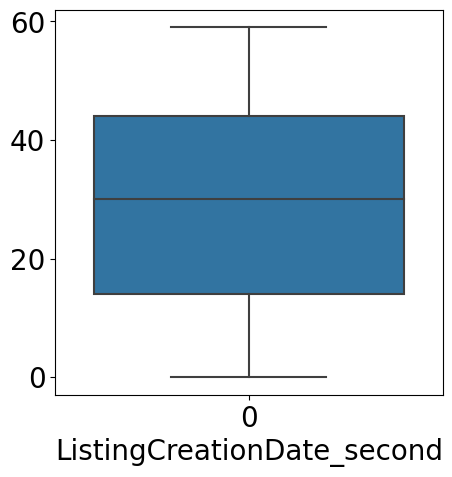

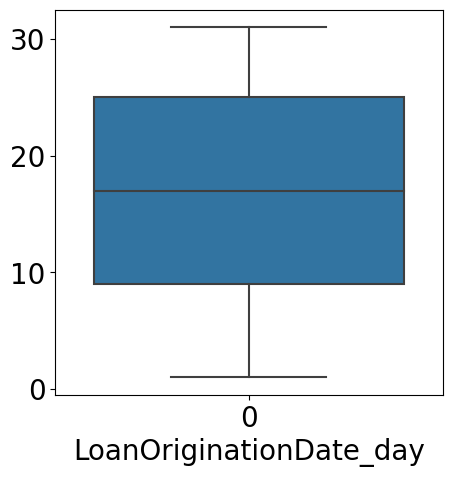

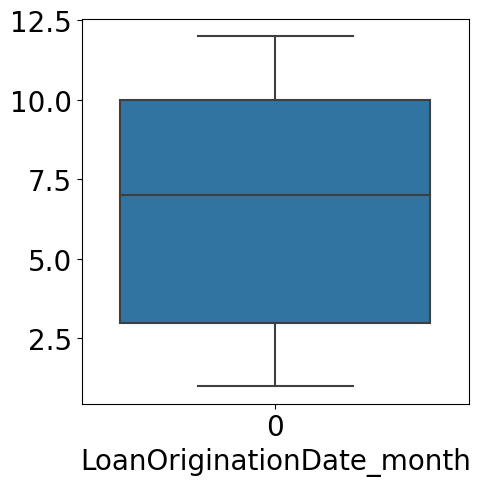

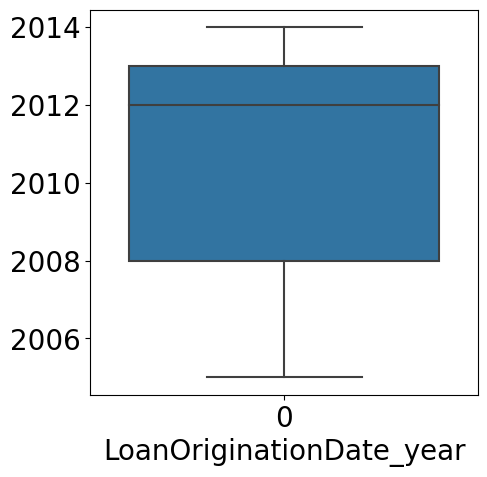

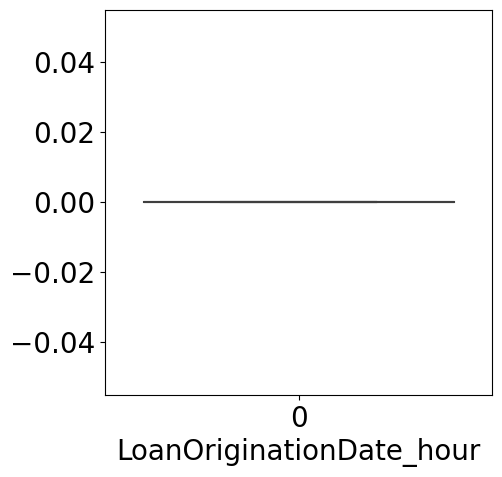

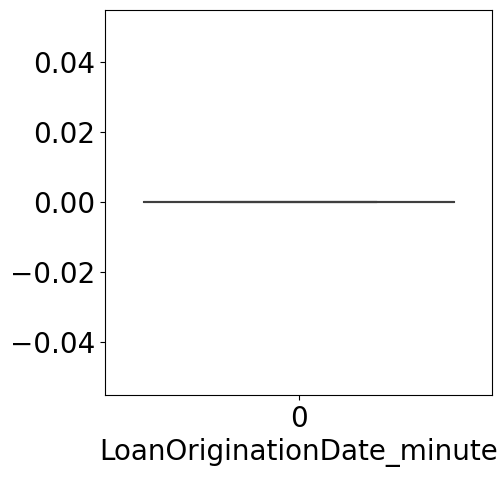

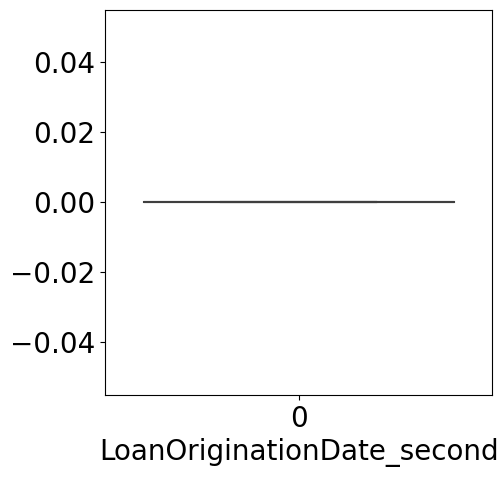

In [527]:
for feature in features :
    fig = plt.subplots(figsize=(5, 5))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.show()
   

In [528]:
!pip install klib
import klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (75), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='OpenCreditLines', ylabel='Density'>

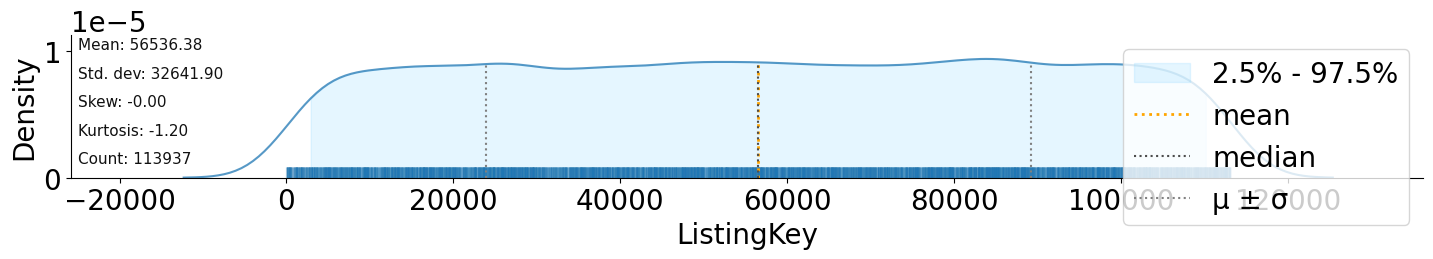

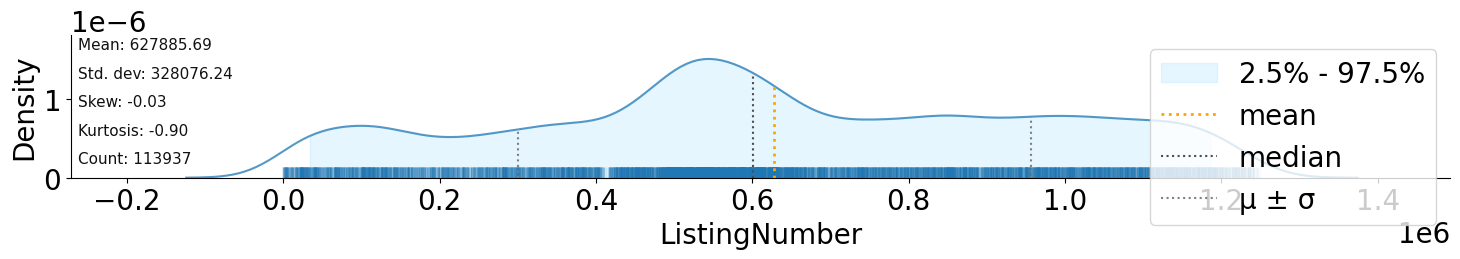

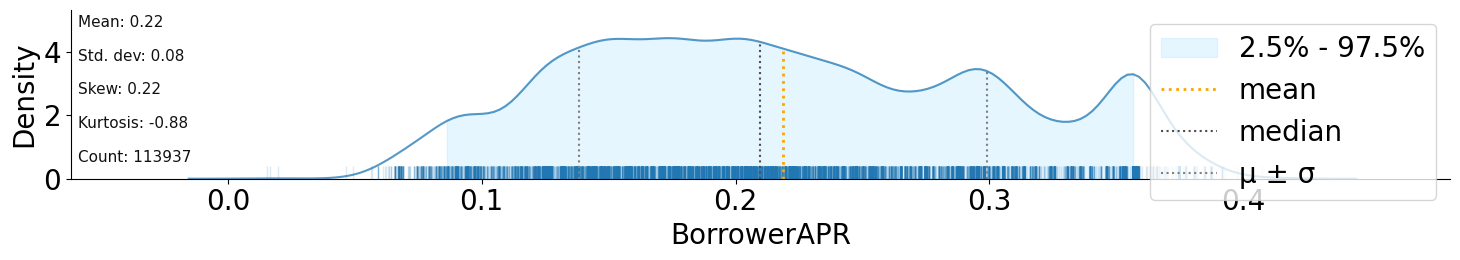

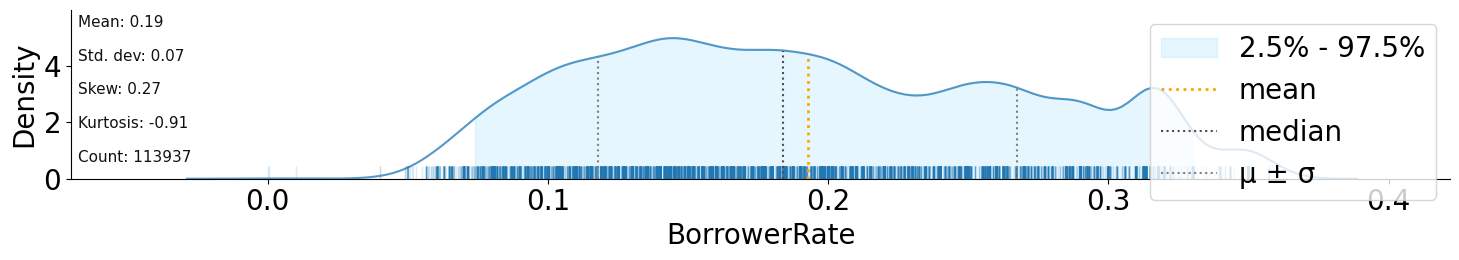

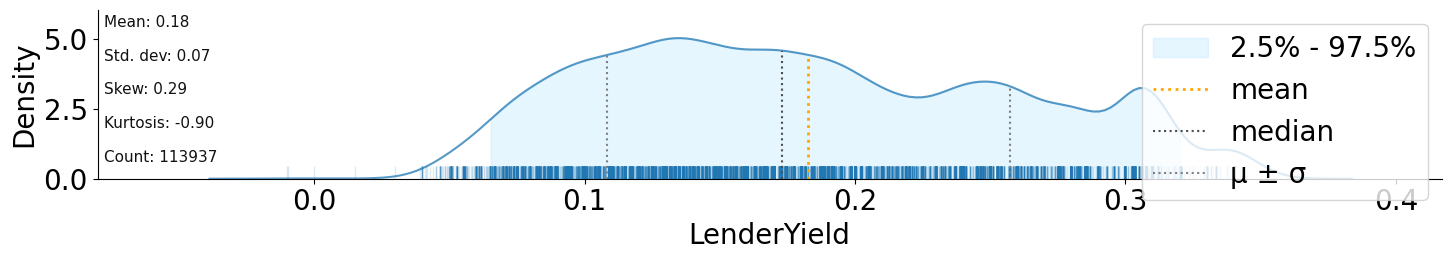

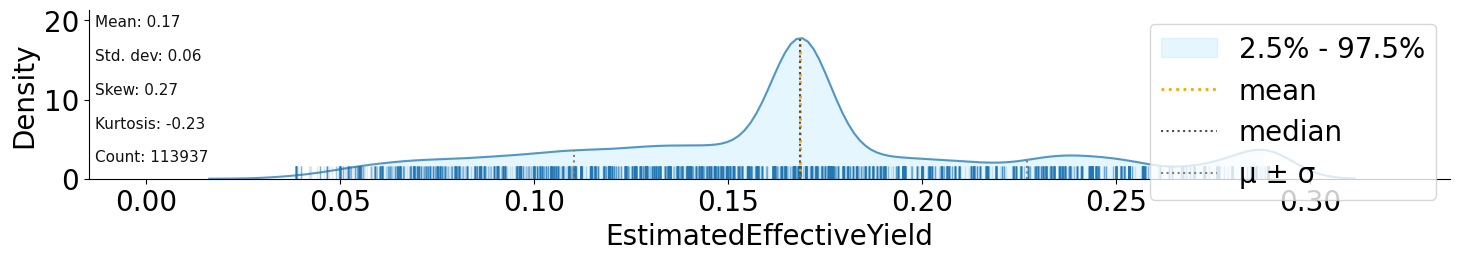

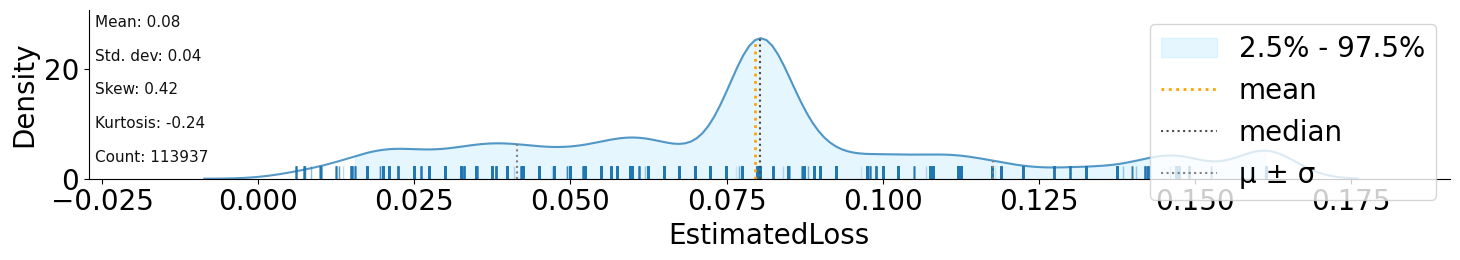

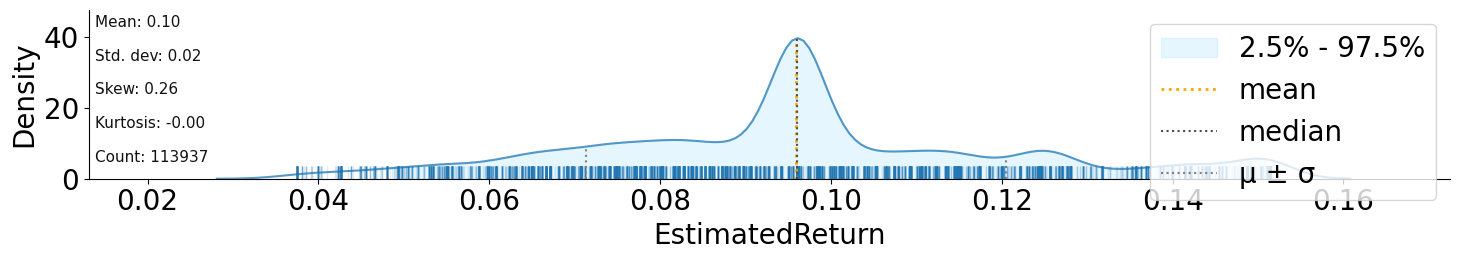

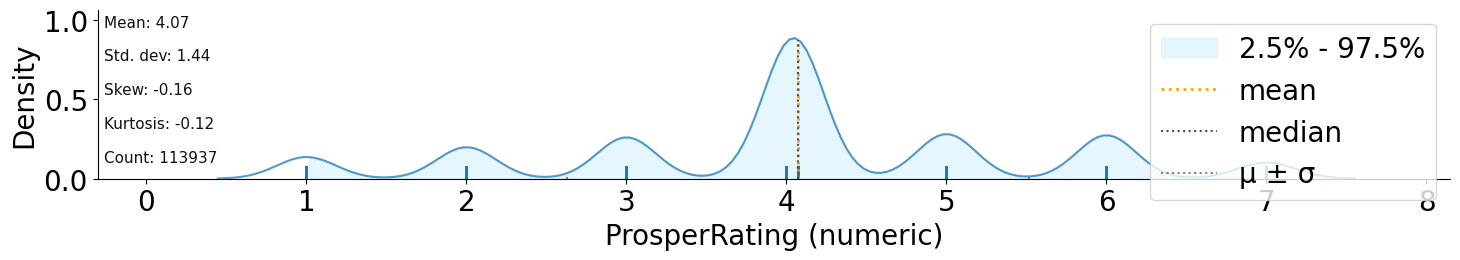

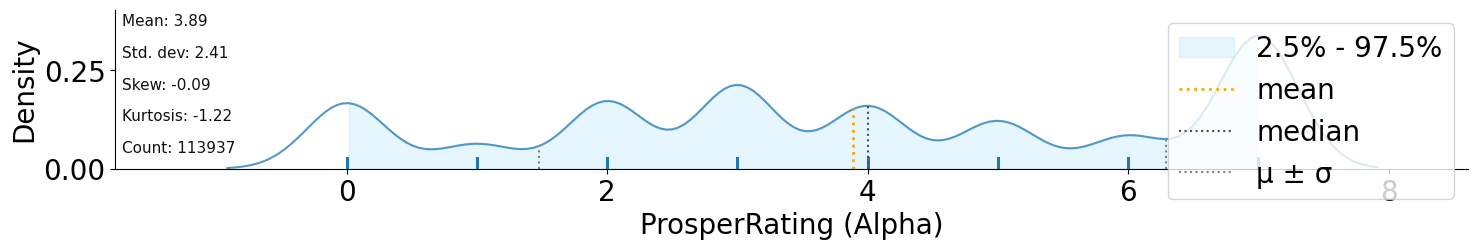

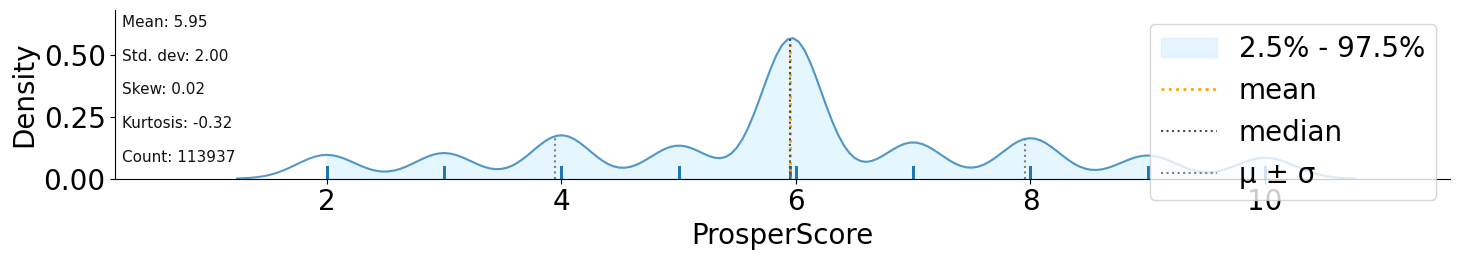

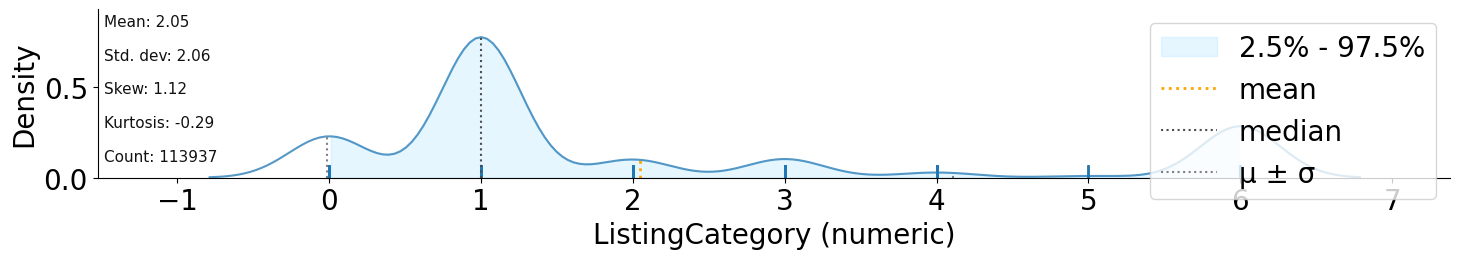

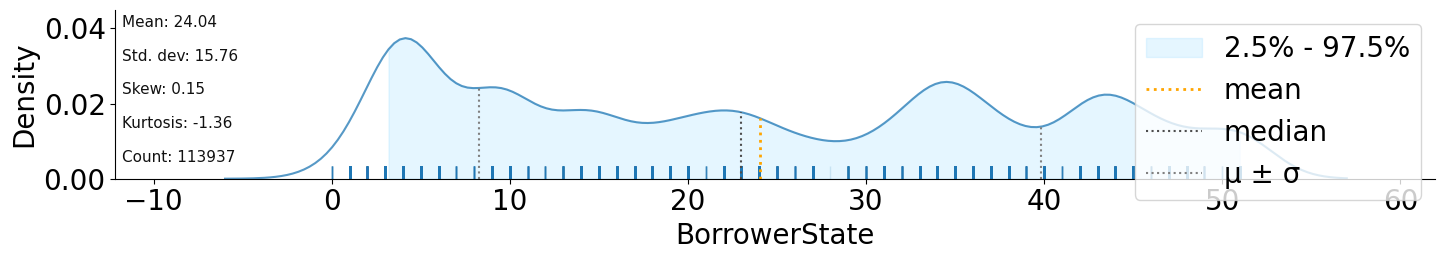

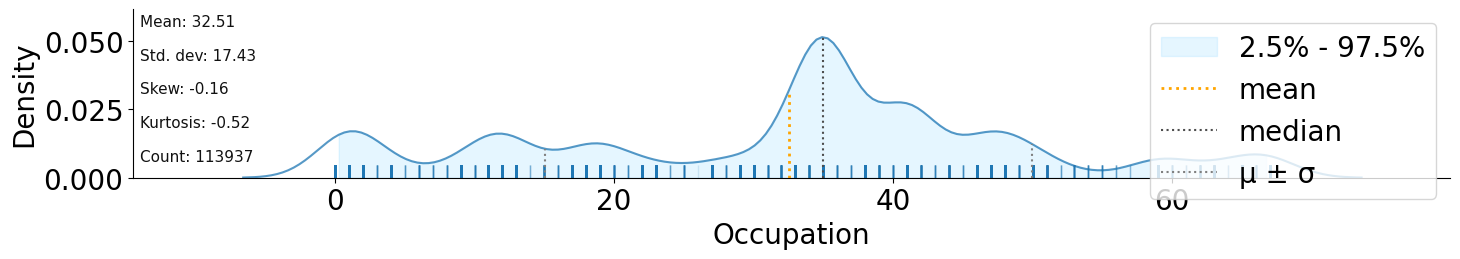

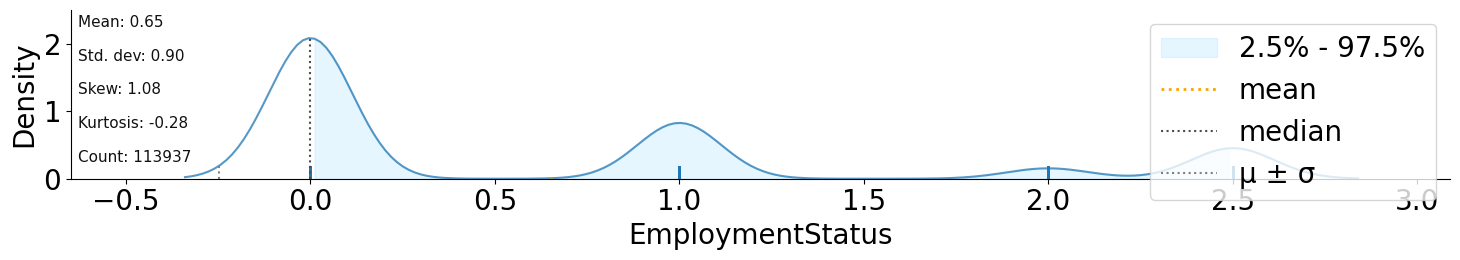

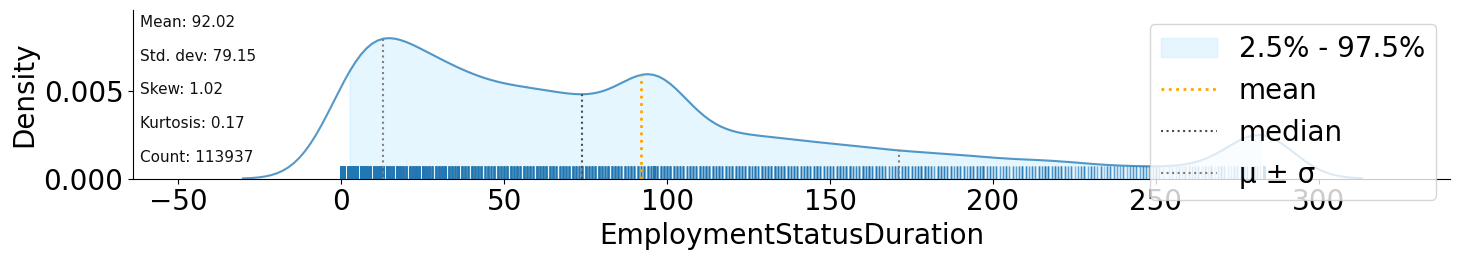

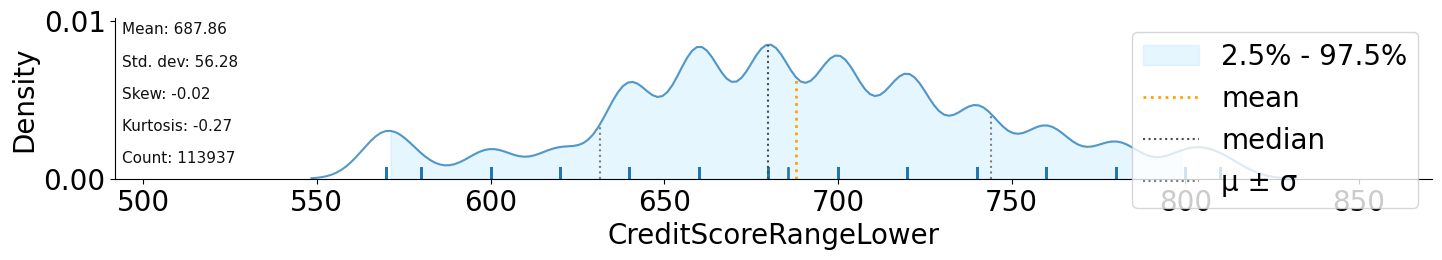

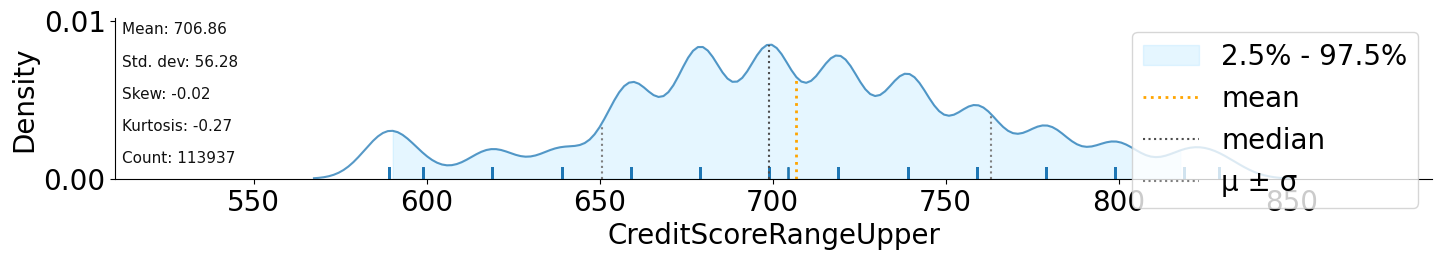

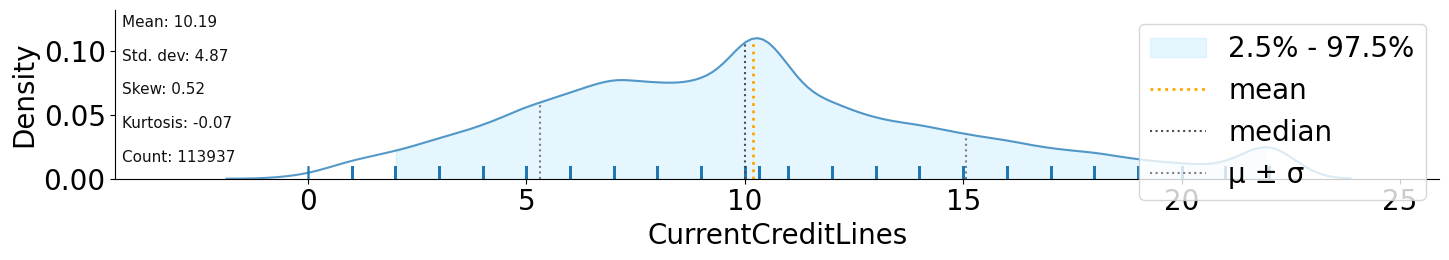

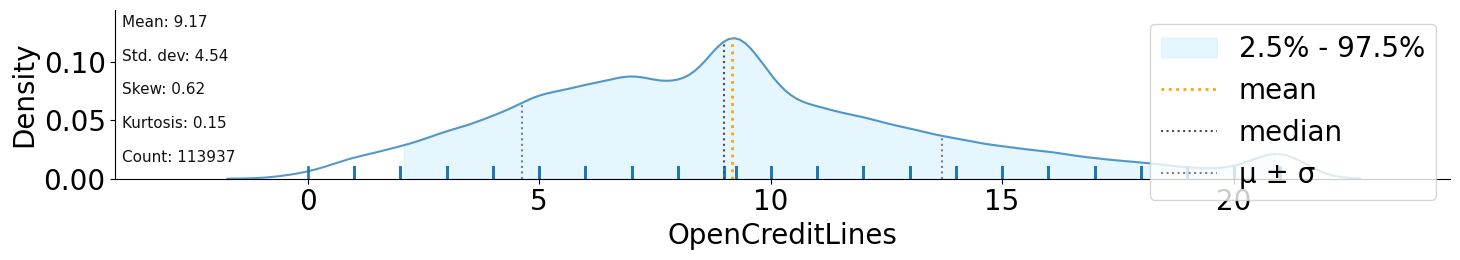

In [529]:
 klib.dist_plot(data) # returns a distribution plot for every numeric feature

In [530]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_data)

StandardScaler()

In [531]:
scaled_data=scaler.transform(new_data)
scaled_data

array([[-1.51209316, -1.32517553, -0.0137176 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.51169489,  1.77325815, -0.0137176 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52842193, -1.66477187,  3.18248377, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3882408 ,  1.34509664, -0.0137176 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38876161, -0.27076049, -0.0137176 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38888415,  1.56125162, -0.0137176 , ...,  0.        ,
         0.        ,  0.        ]])

In [532]:
data.shape

(113937, 111)

In [534]:
from sklearn.decomposition import PCA
pca = PCA(n_components=111)
pca.fit_transform(data)
print (pca.explained_variance_ratio_)


[9.72123684e-01 9.51176461e-03 9.46595848e-03 6.11592267e-03
 1.58902673e-03 6.14480122e-04 3.00022058e-04 1.37525341e-04
 8.12573077e-05 5.41543602e-05 5.36912229e-06 4.17218394e-07
 2.32695423e-07 5.26915098e-08 4.32462918e-08 3.05817519e-08
 2.52649647e-08 6.53466641e-09 5.86353812e-09 3.06781380e-09
 2.62917193e-09 2.16308244e-09 2.15004001e-09 1.95945205e-09
 1.43384607e-09 1.21922608e-09 1.15960327e-09 8.97779889e-10
 8.31794153e-10 6.83341783e-10 5.77580777e-10 5.29488678e-10
 3.54261170e-10 2.57069294e-10 1.89119100e-10 1.86803259e-10
 1.10732246e-10 1.03337102e-10 9.83017870e-11 7.59007371e-11
 6.47796098e-11 4.98700691e-11 4.58559927e-11 3.71114907e-11
 3.04471742e-11 2.90530014e-11 1.05981290e-11 9.52792286e-12
 8.41711960e-12 8.16153375e-12 7.02437242e-12 5.31518625e-12
 4.57388433e-12 3.98455665e-12 1.60522960e-12 1.32373529e-12
 6.24964284e-13 4.49418158e-13 3.66673283e-13 3.49272634e-13
 9.31594775e-14 6.83781492e-14 6.23638859e-14 2.66164271e-14
 5.97615890e-15 5.155787

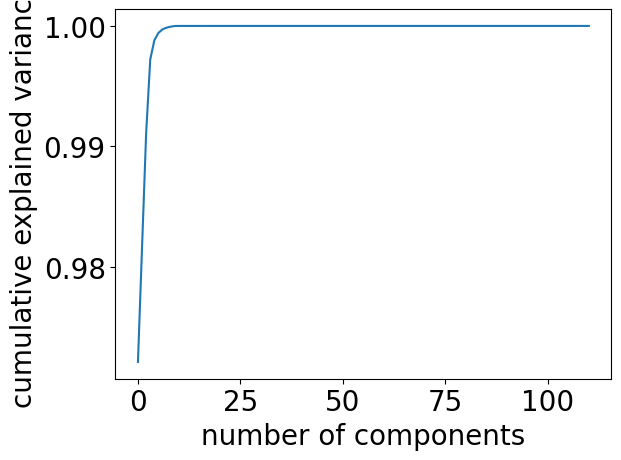

In [535]:
#Explained variance
pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [536]:
#Showing the uncorrelated features 
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
   for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
       colname=corr_matrix.columns[i]
       col_corr.add(colname)
  return col_corr

In [537]:
costing_features =correlation(data,0.7)
costing_features 

{'BorrowerRate',
 'ClosedDate_hour',
 'ClosedDate_minute',
 'ClosedDate_second',
 'CreditScoreRangeUpper',
 'DateCreditPulled_hour',
 'DateCreditPulled_month',
 'DateCreditPulled_year',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LenderYield',
 'ListingCreationDate_date_month',
 'ListingCreationDate_date_year',
 'ListingCreationDate_day',
 'ListingCreationDate_hour',
 'ListingCreationDate_minute',
 'ListingCreationDate_month',
 'ListingCreationDate_second',
 'ListingCreationDate_year',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginationDate_month',
 'LoanOriginationDate_year',
 'MonthlyLoanPayment',
 'OpenCreditLines',
 'OpenRevolvingAccounts',
 'ProsperRating (numeric)',
 'ProsperScore',
 'RevolvingCreditBalance',
 'TotalTrades'}

In [538]:
new_data=data[['BorrowerRate','LoanStatus',
 'CreditGrade',
 'CreditScoreRangeUpper',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LenderYield',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'MonthlyLoanPayment',
 'OpenCreditLines',
 'OpenRevolvingAccounts',
 'ProsperRating (Alpha)',
 'ProsperRating (numeric)',
 'ProsperScore',
 'RevolvingCreditBalance',
 'TotalTrades']]

In [539]:
 new_data.columns

Index(['BorrowerRate', 'LoanStatus', 'CreditGrade', 'CreditScoreRangeUpper',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LenderYield', 'LoanMonthsSinceOrigination', 'LoanNumber',
       'MonthlyLoanPayment', 'OpenCreditLines', 'OpenRevolvingAccounts',
       'ProsperRating (Alpha)', 'ProsperRating (numeric)', 'ProsperScore',
       'RevolvingCreditBalance', 'TotalTrades'],
      dtype='object')

In [540]:
new_data.head()

BorrowerRate  LoanStatus  CreditGrade  CreditScoreRangeUpper  \
0        0.1580           1            3                  659.0   
1        0.0920           1            3                  699.0   
2        0.2750           1            3                  589.0   
3        0.0974           1            3                  819.0   
4        0.2085           1            3                  699.0   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                 0.168661       0.080306         0.096068   
1                 0.079600       0.024900         0.054700   
2                 0.168661       0.080306         0.096068   
3                 0.084900       0.024900         0.060000   
4                 0.183160       0.092500         0.090660   

   LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  ...  \
0                      9248.665             1971.14         -133.18  ...   
1                         0.000                0.00            0.00  ...   
2                      3001.000             1185.63          -24.20  ...   
3                      4091.090             1052.11         -108.01  ...   
4                      1563.220             1256.63          -60.27  ...   

   LoanMonthsSinceOrigination  LoanNumber  MonthlyLoanPayment  \
0                        78.0     19141.0              330.43   
1                         0.0    134815.0              318.93   
2                        86.0      6466.0              123.32   
3                        16.0     77296.0              321.45   
4                         6.0    102670.0              563.97   

   OpenCreditLines  OpenRevolvingAccounts  ProsperRating (Alpha)  \
0         4.000000                    1.0                    7.0   
1        14.000000                   13.0                    0.0   
2         9.260164                    0.0                    7.0   
3         5.000000                    7.0                    0.0   
4        19.000000                    6.0                    4.0   

   ProsperRating (numeric)  ProsperScore  RevolvingCreditBalance  TotalTrades  
0                 4.072243      5.950067                0.000000    11.000000  
1                 6.000000      7.000000             3989.000000    29.000000  
2                 4.072243      5.950067            17598.706751    23.230034  
3                 6.000000      9.000000             1444.000000    26.000000  
4                 3.000000      4.000000             6193.000000    39.000000  

[5 rows x 21 columns]

In [541]:
# !pip install pandas-profiling

In [542]:
# !pip install pandas_profiling --upgrade

In [543]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(new_data)
# profile